# Telco Customer Churn Prediction

## **Problem Statement:**
Telecom companies often face high customer churn rates, which can lead to substantial revenue losses. Identifying customers who are likely to leave (churn) is essential to proactively target them with retention strategies.

The goal of this project is to build a predictive classification model that accurately identifies customers who are likely to churn based on their demographics, service usage, account information, and payment behavior. Using machine learning techniques, we aim to analyze patterns in historical customer data to uncover key drivers of churn and recommend actionable insights to reduce customer attrition.



customerID: A unique identifier for each customer.

gender: The gender of the customer (Male/Female).

SeniorCitizen: Indicates whether the customer is a senior citizen (1: Yes, 0: No).

Partner: Indicates whether the customer has a partner (Yes/No).

Dependents: Indicates whether the customer has dependents (Yes/No).

tenure: The number of months the customer has been with the company.

PhoneService: Indicates whether the customer has phone service (Yes/No).

MultipleLines: Indicates whether the customer has multiple lines (Yes/No).

InternetService: The type of internet service the customer has (DSL/Fiber optic/No).

OnlineSecurity: Indicates whether the customer has online security (Yes/No).

OnlineBackup: Indicates whether the customer has online backup service (Yes/No).

DeviceProtection: Indicates whether the customer has device protection (Yes/No).

TechSupport: Indicates whether the customer has tech support service (Yes/No).

StreamingTV: Indicates whether the customer has streaming TV service (Yes/No).

StreamingMovies: Indicates whether the customer has streaming movies service (Yes/No).

Contract: The type of contract the customer has (Month-to-month/One year/Two year).

PaperlessBilling: Indicates whether the customer has paperless billing (Yes/No).

PaymentMethod: The method the customer uses to pay (Electronic check/Mailed check/Bank transfer/credit card).

MonthlyCharges: The amount charged to the customer each month.

TotalCharges: The total amount charged to the customer during their tenure.

Churn: Indicates whether the customer has churned (1: Yes, 0: No).



In [78]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
import missingno
warnings.filterwarnings("ignore")
%matplotlib inline

In [79]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score,roc_auc_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE


In [80]:
df=pd.read_csv('/content/Telco.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

   The methodology included the following steps:

    - Data cleaning and preprocessing
    - Feature engineering (e.g., encoding, handling missing values)
    - Exploratory Data Analysis (EDA)
    - Model development using multiple classification algorithms

    - Model evaluation using various performance metrics
    - Interpretation of model outputs and feature importance analysis

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [82]:
df.shape

(7043, 21)

**Dataset Overview**:

- Number of Entries: 7043 rows.

- Number of Columns: 21 columns.

In [83]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Cleaning

In [84]:

# Check for blank/empty strings in object columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"Column '{col}': {df[df[col] == ''].shape[0]} blank values")

# Check for null values in all columns
print("\nNull value counts:")
print(df.isnull().sum())


Column 'customerID': 0 blank values
Column 'gender': 0 blank values
Column 'Partner': 0 blank values
Column 'Dependents': 0 blank values
Column 'PhoneService': 0 blank values
Column 'MultipleLines': 0 blank values
Column 'InternetService': 0 blank values
Column 'OnlineSecurity': 0 blank values
Column 'OnlineBackup': 0 blank values
Column 'DeviceProtection': 0 blank values
Column 'TechSupport': 0 blank values
Column 'StreamingTV': 0 blank values
Column 'StreamingMovies': 0 blank values
Column 'Contract': 0 blank values
Column 'PaperlessBilling': 0 blank values
Column 'PaymentMethod': 0 blank values
Column 'TotalCharges': 0 blank values
Column 'Churn': 0 blank values

Null value counts:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         

In [85]:
df.duplicated().sum()

np.int64(0)

In [86]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [87]:
df.describe(include="object").T

count unique               top  freq
customerID        7043   7043        3186-AJIEK     1
gender            7043      2              Male  3555
Partner           7043      2                No  3641
Dependents        7043      2                No  4933
PhoneService      7043      2               Yes  6361
MultipleLines     7043      3                No  3390
InternetService   7043      3       Fiber optic  3096
OnlineSecurity    7043      3                No  3498
OnlineBackup      7043      3                No  3088
DeviceProtection  7043      3                No  3095
TechSupport       7043      3                No  3473
StreamingTV       7043      3                No  2810
StreamingMovies   7043      3                No  2785
Contract          7043      3    Month-to-month  3875
PaperlessBilling  7043      2               Yes  4171
PaymentMethod     7043      4  Electronic check  2365
TotalCharges      7043   6531                      11
Churn             7043      2                No  5174

In [88]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [89]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [90]:
df.columns = [col[0].upper() + col[1:] for col in df.columns]
df.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Segregating Numerical and Categorical data**

In [91]:
# Drop CustomerID as it's not useful for prediction
df.drop(columns=['CustomerID'], inplace=True)

In [92]:
Num_data = df.select_dtypes(include=np.number)
Cat_data = df.select_dtypes(exclude=np.number)

In [93]:
Num_data

SeniorCitizen  Tenure  MonthlyCharges
0                 0       1           29.85
1                 0      34           56.95
2                 0       2           53.85
3                 0      45           42.30
4                 0       2           70.70
...             ...     ...             ...
7038              0      24           84.80
7039              0      72          103.20
7040              0      11           29.60
7041              1       4           74.40
7042              0      66          105.65

[7043 rows x 3 columns]

In [94]:
Cat_data

Gender Partner Dependents PhoneService     MultipleLines  \
0     Female     Yes         No           No  No phone service   
1       Male      No         No          Yes                No   
2       Male      No         No          Yes                No   
3       Male      No         No           No  No phone service   
4     Female      No         No          Yes                No   
...      ...     ...        ...          ...               ...   
7038    Male     Yes        Yes          Yes               Yes   
7039  Female     Yes        Yes          Yes               Yes   
7040  Female     Yes        Yes           No  No phone service   
7041    Male     Yes         No          Yes               Yes   
7042    Male      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod TotalCharges Churn  
0              Electronic check        29.85    No  
1                  Mailed check       1889.5    No  
2                  Mailed check       108.15   Yes  
3     Bank transfer (automatic)      1840.75    No  
4              Electronic check       151.65   Yes  
...                         ...          ...   ...  
7038               Mailed check       1990.5    No  
7039    Credit card (automatic)       7362.9    No  
7040           Electronic check       346.45    No  
7041               Mailed check        306.6   Yes  
7042  Bank transfer (automatic)       6844.5    No  

[7043 rows x 17 columns]

In [95]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: ylabel='count'>

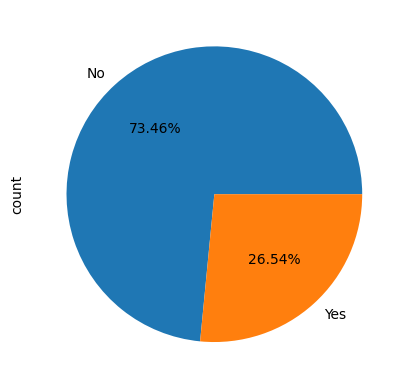

In [96]:
df['Churn'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [97]:
df.TotalCharges.value_counts()

TotalCharges
           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
130.15      1
3211.9      1
7843.55     1
2196.3      1
197.4       1
Name: count, Length: 6531, dtype: int64

In [98]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip())
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [99]:
df.isnull().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are atlreast 11 blank values in 'TotalCharges' variable.




In [100]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [101]:
# Fill NaN values in 'TotalCharges' (you might choose a different strategy)
df['TotalCharges'].fillna(0, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(int)

In [102]:
df.isnull().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [103]:
df['Dependents'].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

<Axes: ylabel='count'>

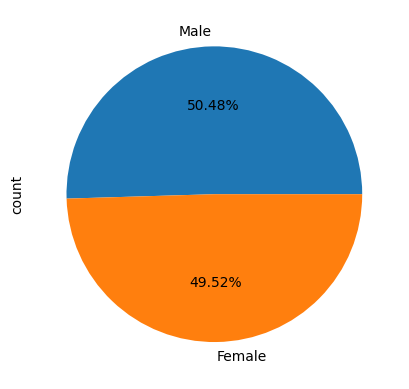

In [104]:
df.Gender.value_counts().plot(kind='pie',autopct='%.2f%%')

In [105]:
df.SeniorCitizen.value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [106]:
df.Contract.value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

<Axes: ylabel='count'>

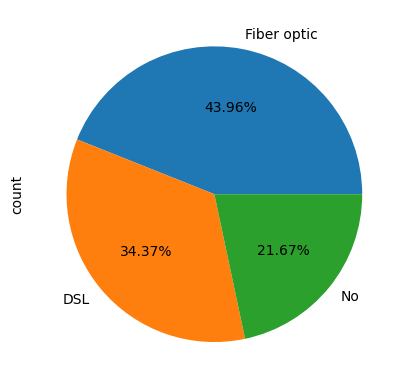

In [107]:
df.InternetService.value_counts().plot  (kind='pie',autopct='%.2f%%')

In [108]:
df.groupby('Gender')['SeniorCitizen'].value_counts()

Gender  SeniorCitizen
Female  0                2920
        1                 568
Male    0                2981
        1                 574
Name: count, dtype: int64

In [109]:
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [110]:
df.groupby('Contract')['Churn'].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: count, dtype: int64

<Axes: xlabel='Contract,Churn'>

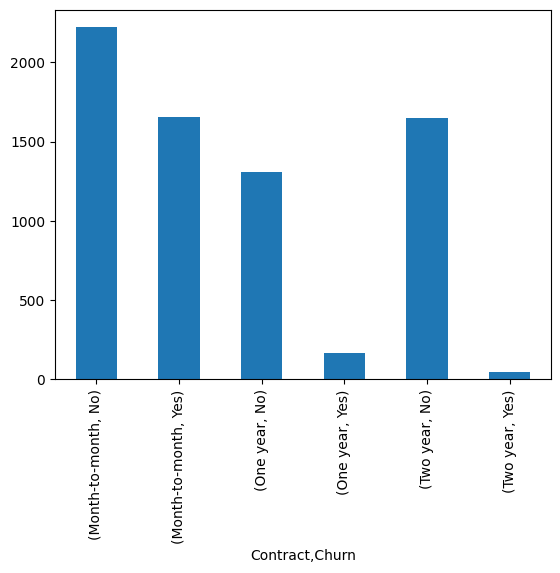

In [111]:
df.groupby('Contract')['Churn'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender,Churn'>

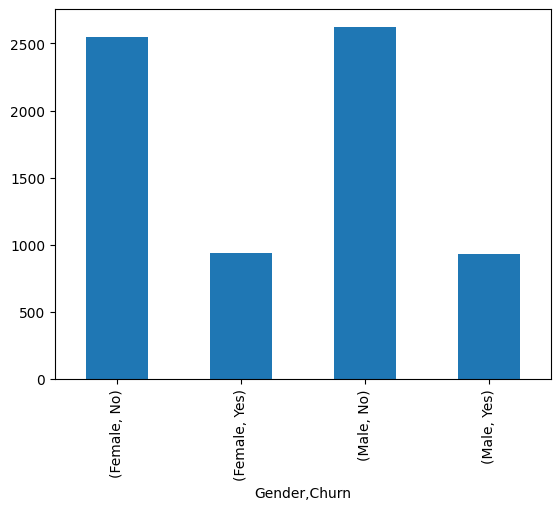

In [112]:
df.groupby('Gender')['Churn'].value_counts().plot (kind='bar')

In [113]:
#value_counts for all columns
for i in df.columns:
  print(df[i].value_counts())
  print("="*50)

Gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No

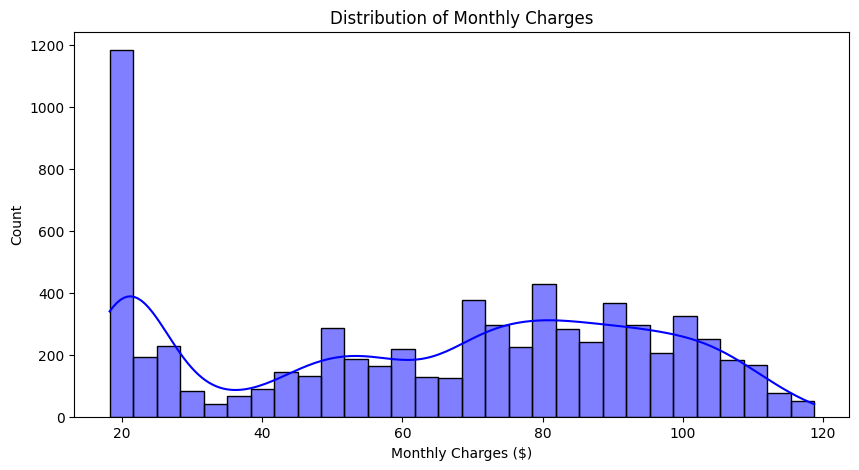

In [114]:
plt.figure(figsize=(10, 5))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='Blue')
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Count")
plt.show()

In [115]:
Cat_data

Gender Partner Dependents PhoneService     MultipleLines  \
0     Female     Yes         No           No  No phone service   
1       Male      No         No          Yes                No   
2       Male      No         No          Yes                No   
3       Male      No         No           No  No phone service   
4     Female      No         No          Yes                No   
...      ...     ...        ...          ...               ...   
7038    Male     Yes        Yes          Yes               Yes   
7039  Female     Yes        Yes          Yes               Yes   
7040  Female     Yes        Yes           No  No phone service   
7041    Male     Yes         No          Yes               Yes   
7042    Male      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod TotalCharges Churn  
0              Electronic check        29.85    No  
1                  Mailed check       1889.5    No  
2                  Mailed check       108.15   Yes  
3     Bank transfer (automatic)      1840.75    No  
4              Electronic check       151.65   Yes  
...                         ...          ...   ...  
7038               Mailed check       1990.5    No  
7039    Credit card (automatic)       7362.9    No  
7040           Electronic check       346.45    No  
7041               Mailed check        306.6   Yes  
7042  Bank transfer (automatic)       6844.5    No  

[7043 rows x 17 columns]

In [116]:
Cat_data.columns

Index(['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

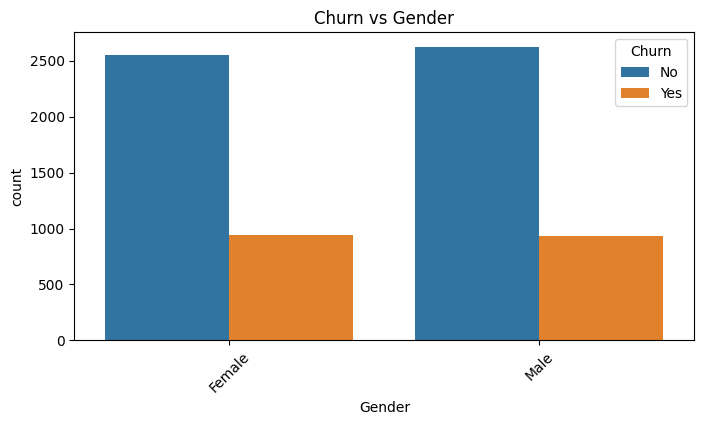

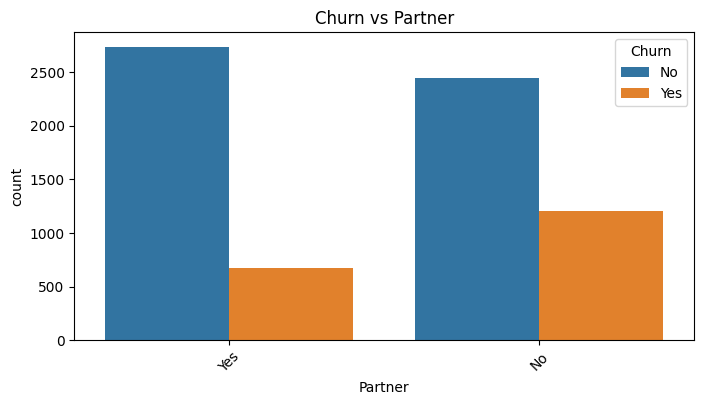

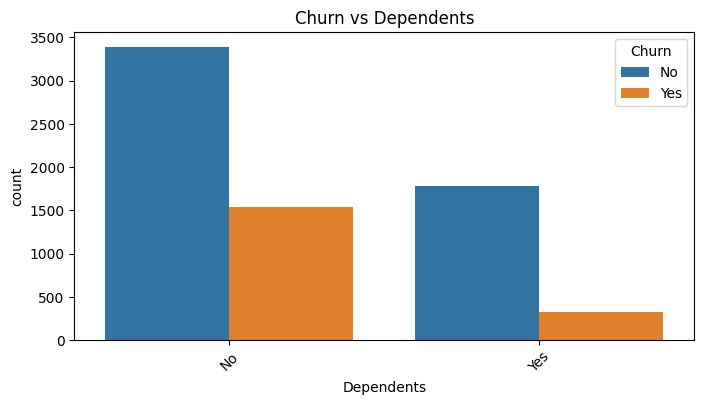

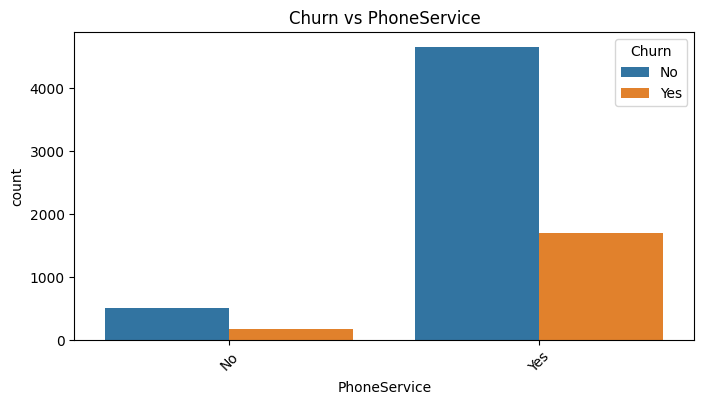

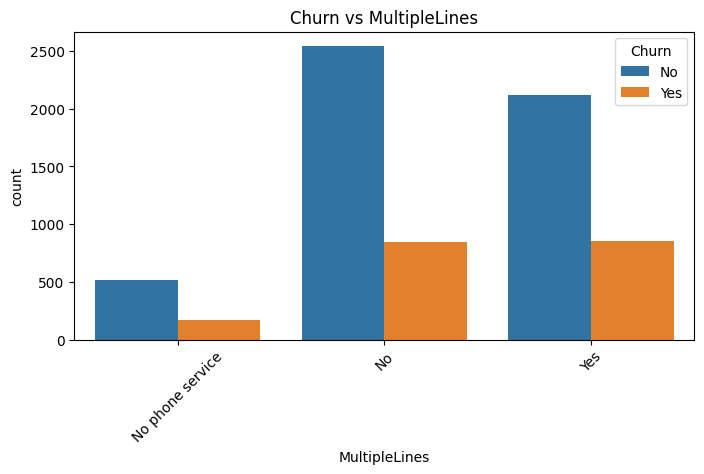

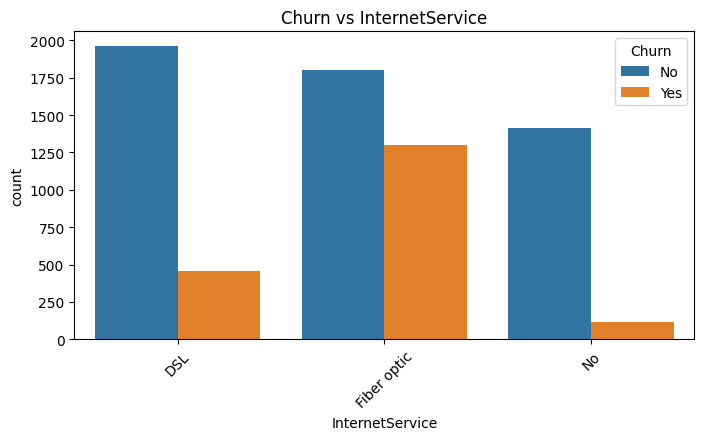

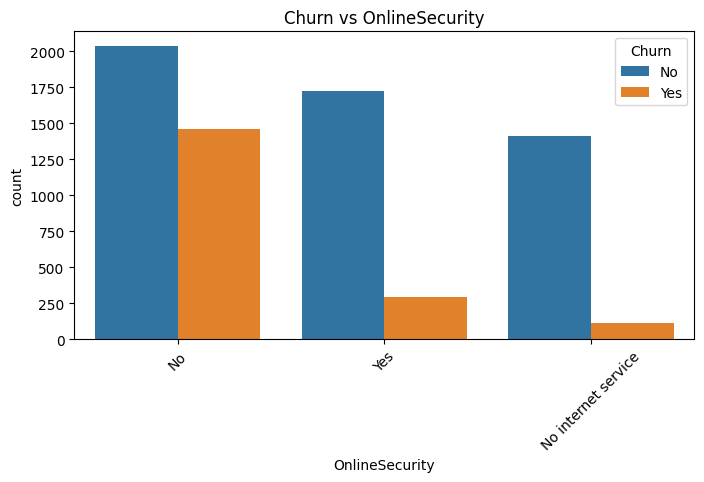

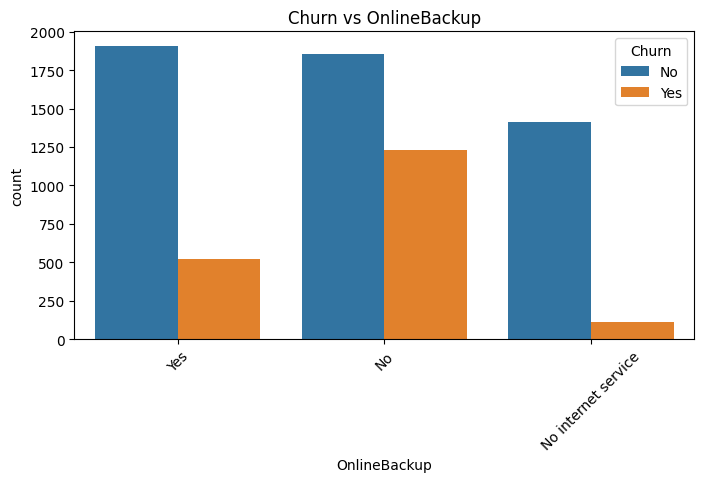

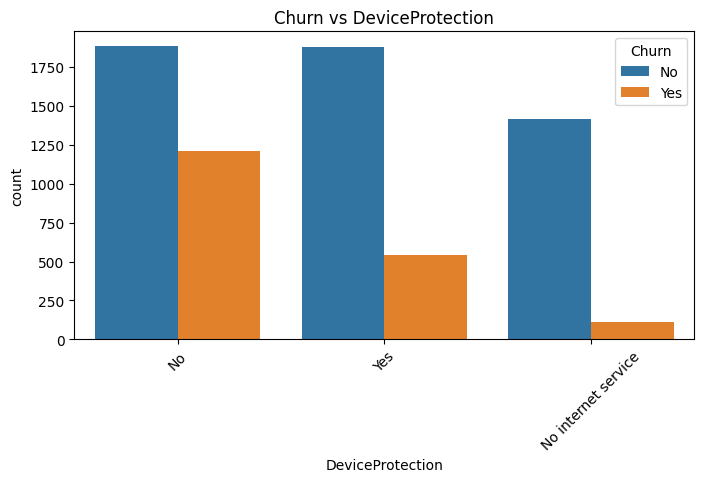

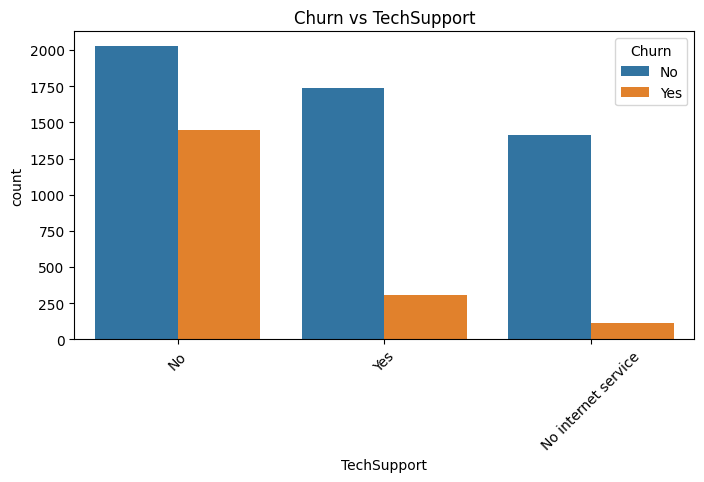

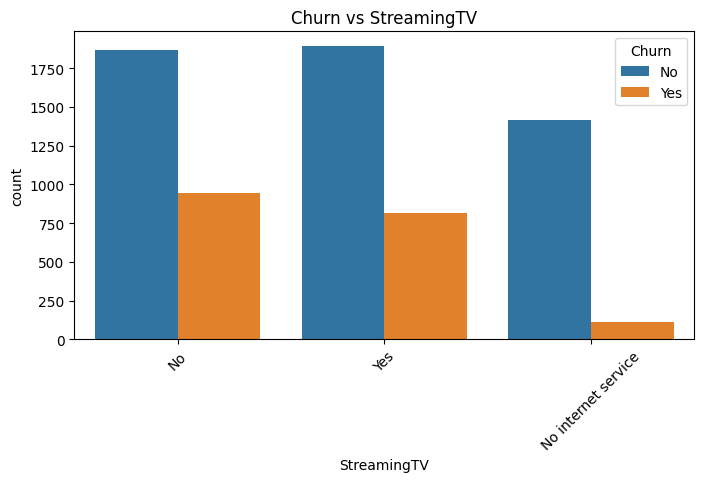

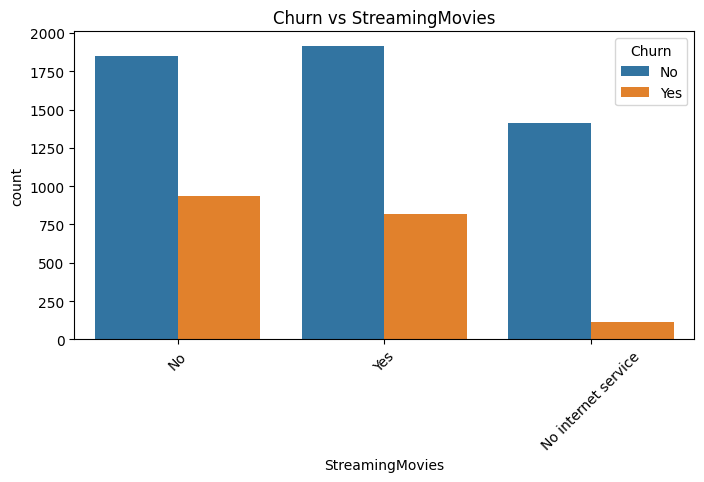

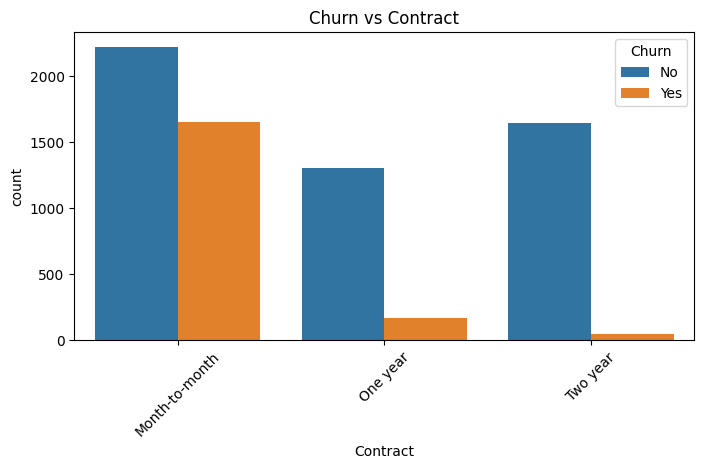

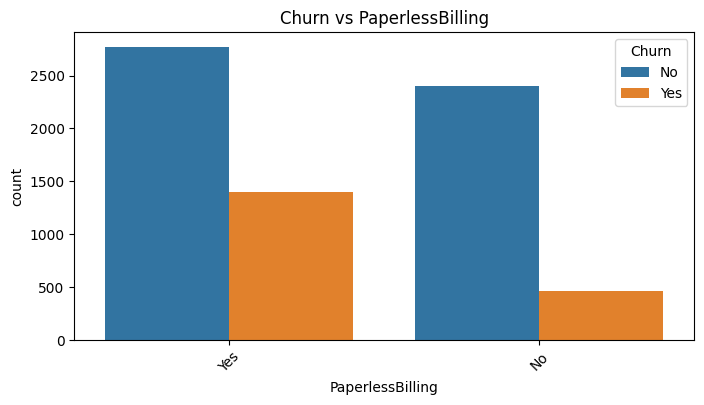

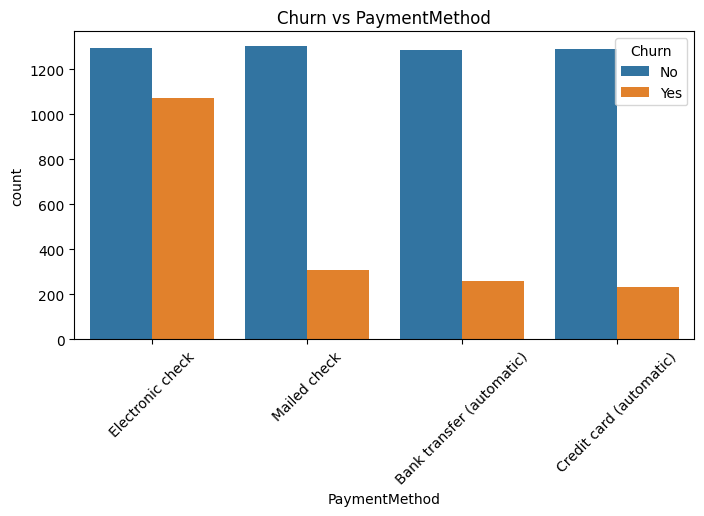

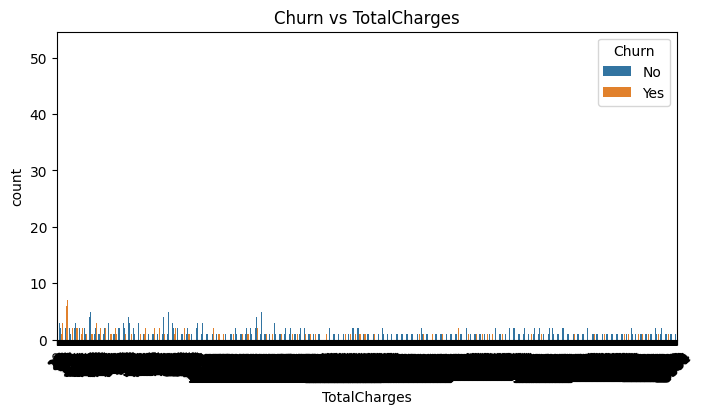

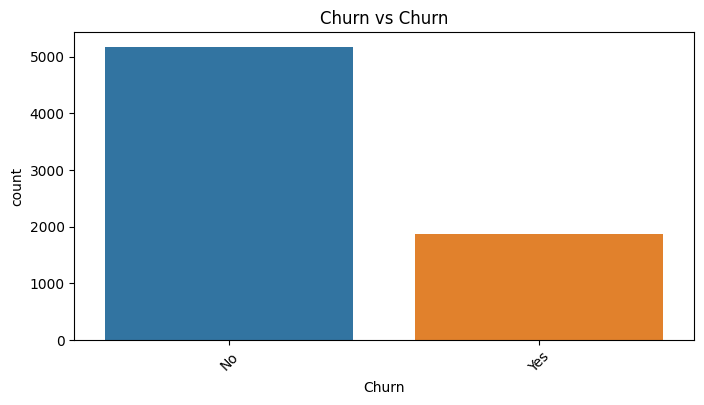

In [117]:
#Cat_data=Cat_data.drop(['TotalCharges'])
for col in Cat_data:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Churn vs {col}')
    plt.xticks(rotation=45)
    plt.show()

Churn Rate:

- About 26.5% customers have left which is very high


- Senior citizens are more likely to churn.
- Gender doesn’t seem to matter much.

Tenure Insight:

- People with less than a year with the company leave the most.
- Long-time customers usually stay loyal.

Contract Type:

- Month-to-month plans have the highest churn.
- One or two-year contracts are much more stable.

Internet Service:

- Fiber optic customers leave more compared to DSL or no-internet users. Probably due to cost or service issues.

Charges Factor:

- Customers paying higher monthly charges churn more.
But those with high total charges usually stay.

Payments:

- Electronic checks are linked to more churn.
Auto-pay methods seem to help keep customers.

Services factoer

- People without security, backup, or tech support are leaving more.
Adding these services might help reduce churn.



In [118]:
df1=df.copy()

In [119]:
#Coverting categorical data to numeric
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each column in the DataFrame
for col in df1.columns:
    # Check if the column data type is object (categorical)
    if df1[col].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        df1[col] = le.fit_transform(df1[col])


In [120]:
df1

Gender  SeniorCitizen  Partner  Dependents  Tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2           29.85            29      0  
1                    0              3           56.95          1889      0  
2                    1              3           53.85           108      1  
3                    0              0           42.30          1840      0  
4                    1              2           70.70           151      1  
...                ...            ...             ...           ...    ...  
7038                 1              3           84.80          1990      0  
7039                 1              1          103.20          7362      0  
7040                 1              2           29.60           346      0  
7041                 1              3           74.40           306      1  
7042                 1              0          105.65          6844      0  

[7043 rows x 20 columns]

In [121]:
df1.corr()#Correlation


Gender  SeniorCitizen   Partner  Dependents    Tenure  \
Gender            1.000000      -0.001874 -0.001808    0.010517  0.005106   
SeniorCitizen    -0.001874       1.000000  0.016479   -0.211185  0.016567   
Partner          -0.001808       0.016479  1.000000    0.452676  0.379697   
Dependents        0.010517      -0.211185  0.452676    1.000000  0.159712   
Tenure            0.005106       0.016567  0.379697    0.159712  1.000000   
PhoneService     -0.006488       0.008576  0.017706   -0.001762  0.008448   
MultipleLines    -0.006739       0.146185  0.142410   -0.024991  0.343032   
InternetService  -0.000863      -0.032310  0.000891    0.044590 -0.030359   
OnlineSecurity   -0.015017      -0.128221  0.150828    0.152166  0.325468   
OnlineBackup     -0.012057      -0.013632  0.153130    0.091015  0.370876   
DeviceProtection  0.000549      -0.021398  0.166330    0.080537  0.371105   
TechSupport      -0.006825      -0.151268  0.126733    0.133524  0.322942   
StreamingTV      -0.006421       0.030776  0.137341    0.046885  0.289373   
StreamingMovies  -0.008743       0.047266  0.129574    0.021321  0.296866   
Contract          0.000126      -0.142554  0.294806    0.243187  0.671607   
PaperlessBilling -0.011754       0.156530 -0.014877   -0.111377  0.006152   
PaymentMethod     0.017352      -0.038551 -0.154798   -0.040292 -0.370436   
MonthlyCharges   -0.014569       0.220173  0.096848   -0.113890  0.247900   
TotalCharges     -0.000079       0.103008  0.317503    0.062078  0.826179   
Churn            -0.008612       0.150889 -0.150448   -0.164221 -0.352229   

                  PhoneService  MultipleLines  InternetService  \
Gender               -0.006488      -0.006739        -0.000863   
SeniorCitizen         0.008576       0.146185        -0.032310   
Partner               0.017706       0.142410         0.000891   
Dependents           -0.001762      -0.024991         0.044590   
Tenure                0.008448       0.343032        -0.030359   
PhoneService          1.000000      -0.020538         0.387436   
MultipleLines        -0.020538       1.000000        -0.109216   
InternetService       0.387436      -0.109216         1.000000   
OnlineSecurity       -0.015198       0.007141        -0.028416   
OnlineBackup          0.024105       0.117327         0.036138   
DeviceProtection      0.003727       0.122318         0.044944   
TechSupport          -0.019158       0.011466        -0.026047   
StreamingTV           0.055353       0.175059         0.107417   
StreamingMovies       0.043870       0.180957         0.098350   
Contract              0.002247       0.110842         0.099721   
PaperlessBilling      0.016505       0.165146        -0.138625   
PaymentMethod        -0.004184      -0.176793         0.086140   
MonthlyCharges        0.247398       0.433576        -0.323260   
TotalCharges          0.113213       0.452576        -0.175756   
Churn                 0.011942       0.038037        -0.047291   

                  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
Gender                 -0.015017     -0.012057          0.000549    -0.006825   
SeniorCitizen          -0.128221     -0.013632         -0.021398    -0.151268   
Partner                 0.150828      0.153130          0.166330     0.126733   
Dependents              0.152166      0.091015          0.080537     0.133524   
Tenure                  0.325468      0.370876          0.371105     0.322942   
PhoneService           -0.015198      0.024105          0.003727    -0.019158   
MultipleLines           0.007141      0.117327          0.122318     0.011466   
InternetService        -0.028416      0.036138          0.044944    -0.026047   
OnlineSecurity          1.000000      0.185126          0.175985     0.285028   
OnlineBackup            0.185126      1.000000          0.187757     0.195748   
DeviceProtection        0.175985      0.187757          1.000000     0.240593   
TechSupport             0.285028      0.195

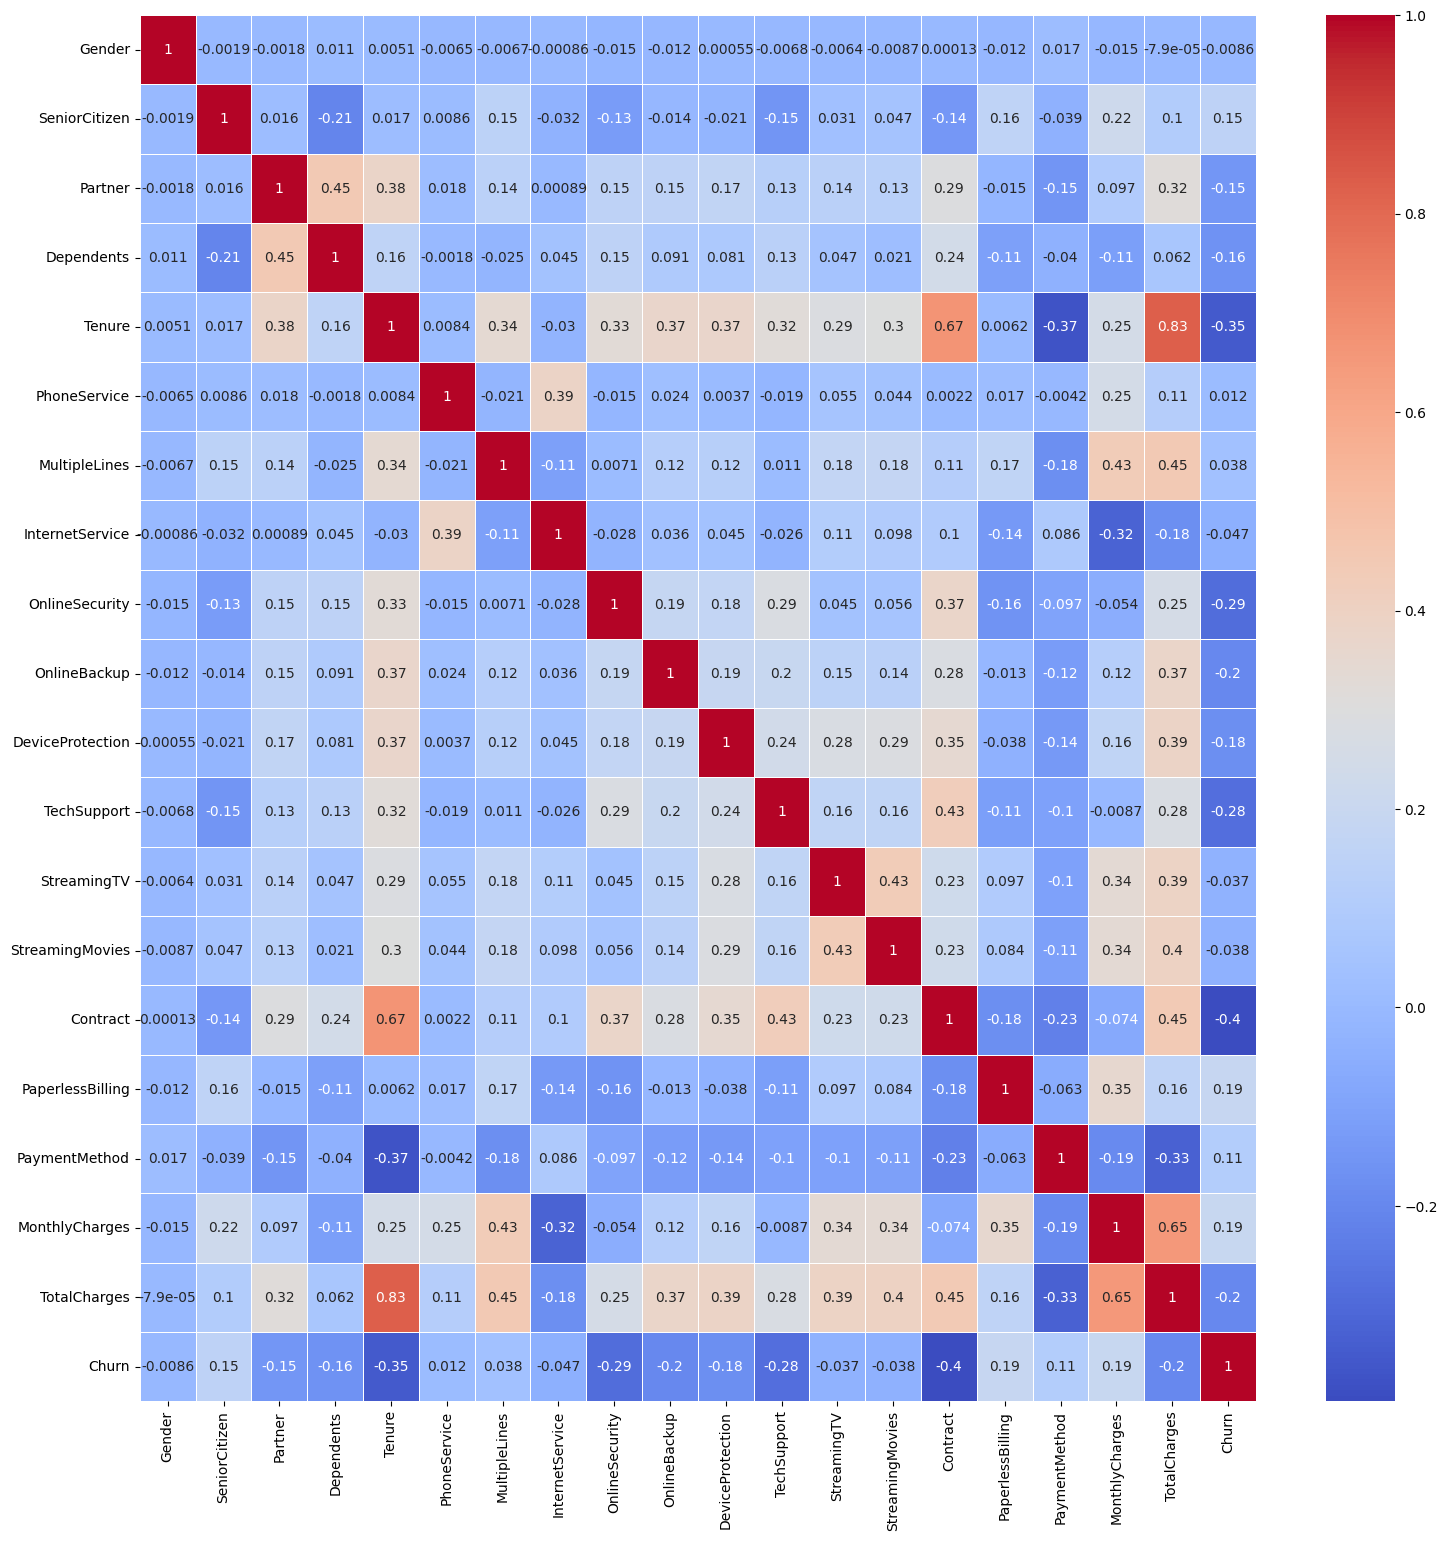

In [122]:
Correlation_matrix=df1.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(Correlation_matrix,annot=True,linewidths=0.5,cmap='coolwarm')
plt.show()

In [123]:
corr_matrix = df1.corr()
def categorize_correlation(corr_value):
    if corr_value >= 0.5:
        return 'Strong'
    elif corr_value >= 0.3:
        return 'Moderate'
    else:
        return 'Low'


categorized_corr = corr_matrix.applymap(categorize_correlation)
print("\nCategorized Correlation Matrix:")
#print(categorized_corr)
categorized_corr


Categorized Correlation Matrix:


Gender SeniorCitizen   Partner Dependents    Tenure  \
Gender            Strong           Low       Low        Low       Low   
SeniorCitizen        Low        Strong       Low        Low       Low   
Partner              Low           Low    Strong   Moderate  Moderate   
Dependents           Low           Low  Moderate     Strong       Low   
Tenure               Low           Low  Moderate        Low    Strong   
PhoneService         Low           Low       Low        Low       Low   
MultipleLines        Low           Low       Low        Low  Moderate   
InternetService      Low           Low       Low        Low       Low   
OnlineSecurity       Low           Low       Low        Low  Moderate   
OnlineBackup         Low           Low       Low        Low  Moderate   
DeviceProtection     Low           Low       Low        Low  Moderate   
TechSupport          Low           Low       Low        Low  Moderate   
StreamingTV          Low           Low       Low        Low       Low   
StreamingMovies      Low           Low       Low        Low       Low   
Contract             Low           Low       Low        Low    Strong   
PaperlessBilling     Low           Low       Low        Low       Low   
PaymentMethod        Low           Low       Low        Low       Low   
MonthlyCharges       Low           Low       Low        Low       Low   
TotalCharges         Low           Low  Moderate        Low    Strong   
Churn                Low           Low       Low        Low       Low   

                 PhoneService MultipleLines InternetService OnlineSecurity  \
Gender                    Low           Low             Low            Low   
SeniorCitizen             Low           Low             Low            Low   
Partner                   Low           Low             Low            Low   
Dependents                Low           Low             Low            Low   
Tenure                    Low      Moderate             Low       Moderate   
PhoneService           Strong           Low        Moderate            Low   
MultipleLines             Low        Strong             Low            Low   
InternetService      Moderate           Low          Strong            Low   
OnlineSecurity            Low           Low             Low         Strong   
OnlineBackup              Low           Low             Low            Low   
DeviceProtection          Low           Low             Low            Low   
TechSupport               Low           Low             Low            Low   
StreamingTV               Low           Low             Low            Low   
StreamingMovies           Low           Low             Low            Low   
Contract                  Low           Low             Low       Moderate   
PaperlessBilling          Low           Low             Low            Low   
PaymentMethod             Low           Low             Low            Low   
MonthlyCharges            Low      Moderate             Low            Low   
TotalCharges              Low      Moderate             Low            Low   
Churn                     Low           Low             Low            Low   

                 OnlineBackup DeviceProtection TechSupport StreamingTV  \
Gender                    Low              Low         Low         Low   
SeniorCitizen             Low              Low         Low         Low   
Partner                   Low              Low         Low         Low   
Dependents                Low              Low         Low         Low   
Tenure               Moderate         Moderate    Moderate         Low   
PhoneService              Low              Low         Low         Low   
MultipleLines             Low              Low         Low         Low   
InternetService           Low              Low         Low         Low   
OnlineSecurity            Low              Low         Low         Low   
OnlineBackup           Strong              Low         Low         Low   
DeviceProtection          Low  

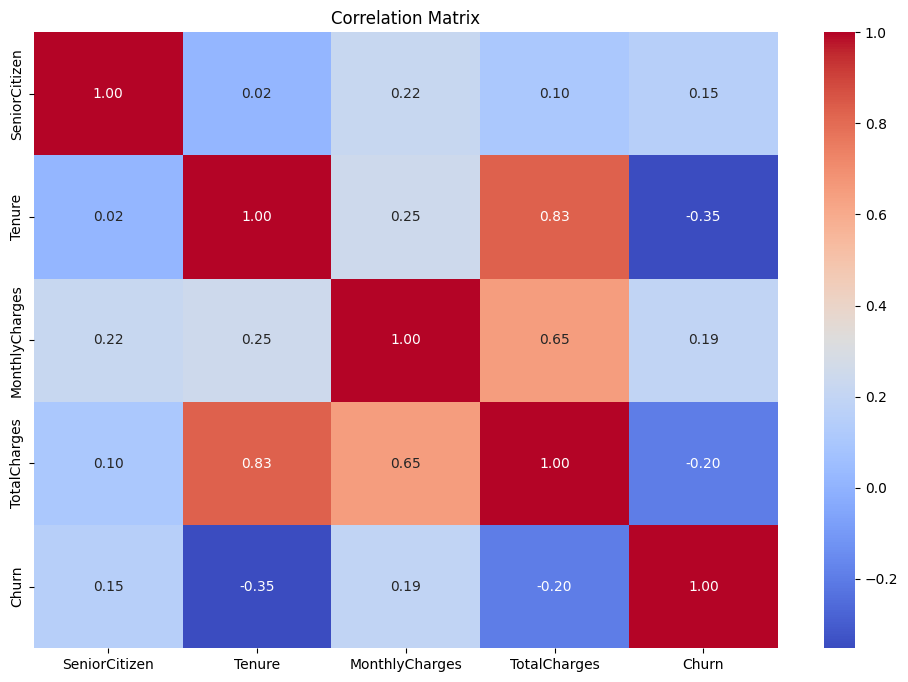

In [124]:
#   relationships between numerical features and 'Churn'
corr_data = df1[['SeniorCitizen','Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

corr_matrix = corr_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [125]:
#corr_matrix = df1.corr()
def categorize_correlation(corr_value):
    if corr_value >= 0.5:
        return 'Strong'
    elif corr_value >= 0.3:
        return 'Moderate'
    else:
        return 'Low'


categorized_corr = corr_matrix.applymap(categorize_correlation)
print("\nCategorized Correlation Matrix:")
#print(categorized_corr)
categorized_corr


Categorized Correlation Matrix:


SeniorCitizen  Tenure MonthlyCharges TotalCharges   Churn
SeniorCitizen         Strong     Low            Low          Low     Low
Tenure                   Low  Strong            Low       Strong     Low
MonthlyCharges           Low     Low         Strong       Strong     Low
TotalCharges             Low  Strong         Strong       Strong     Low
Churn                    Low     Low            Low          Low  Strong

**Observations:**
 - We can see their is high positive correlation between the Tenure and Total Charges which is obvious as longer the tenure more the Total Charges.
 -MonthlyCharges and TotalCharges have a Moderate Correlation (+0.65)
 -Tenure has negative correlation with Target variable -Churn ,means customers with longer tenure are likely to churn  
 -While these two are positively correlated, it's not as strong as tenure-total charges, indicating that customers might have different billing plans affecting the total charges. Tenure has a Negative Correlation with Churn (-0.35)

 -This suggests that customers with longer tenure are less likely to churn. In other words, newer customers are more prone to leaving.

 -TotalCharges has a Slightly Negative Correlation with Churn (-0.20)Customers with higher total charges are slightly less likely to churn, which aligns with the tenure observation.
 - SeniorCitizen has a Weak Positive Correlation with Churn (+0.15)Senior citizens may have a slightly higher tendency to churn, but the correlation is weak, meaning other factors likely influence churn more strongly.





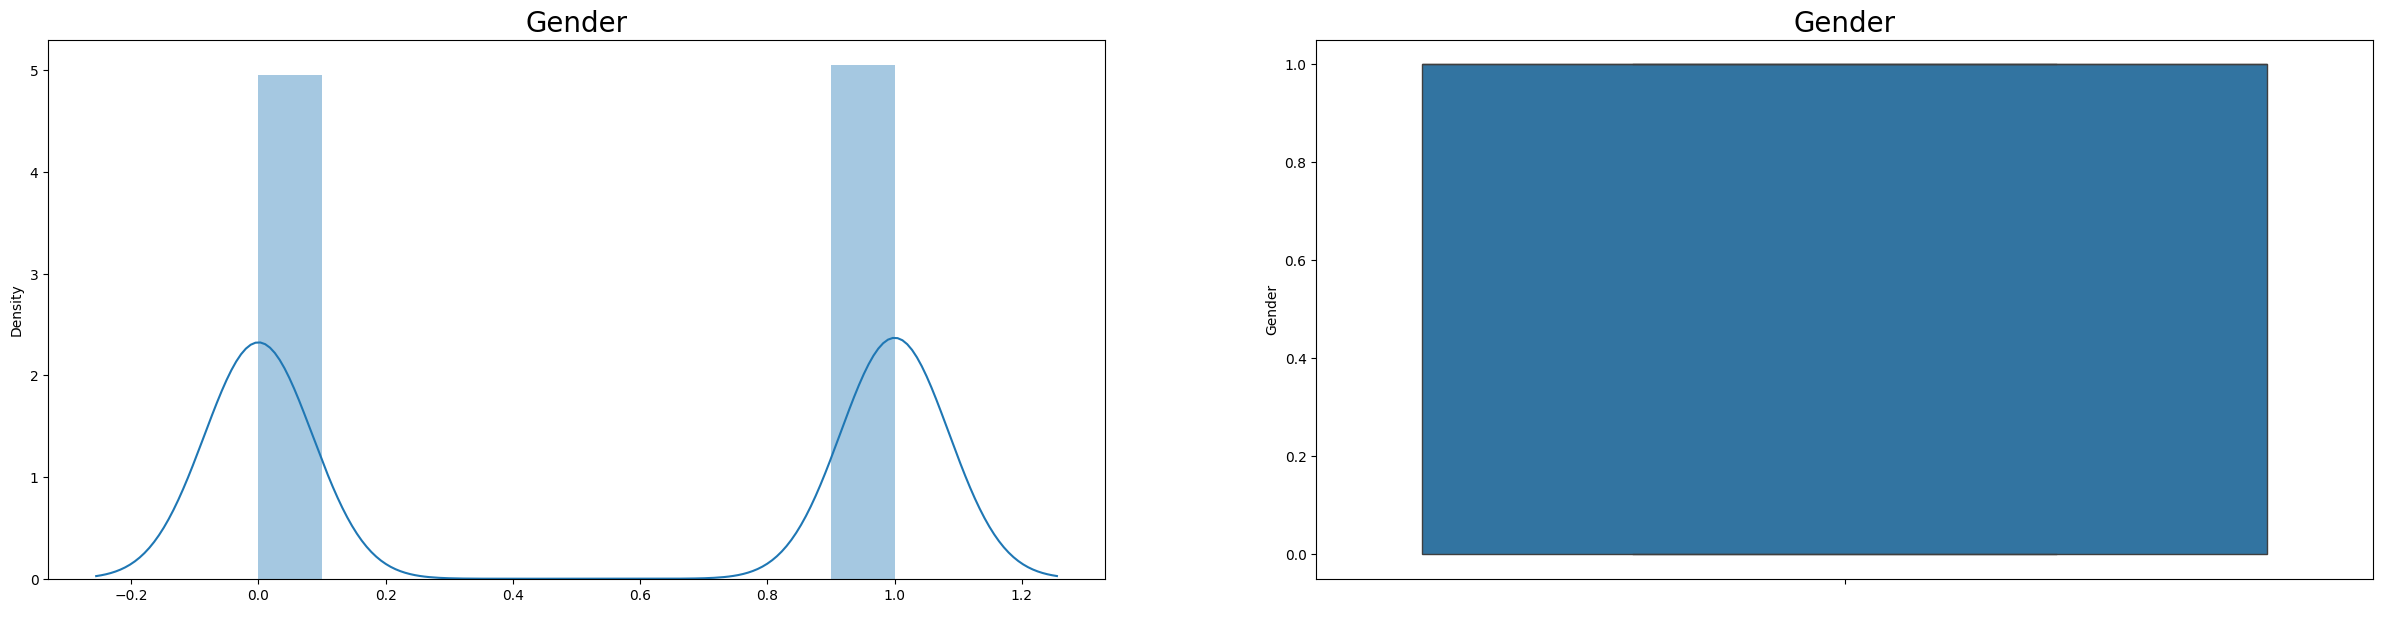

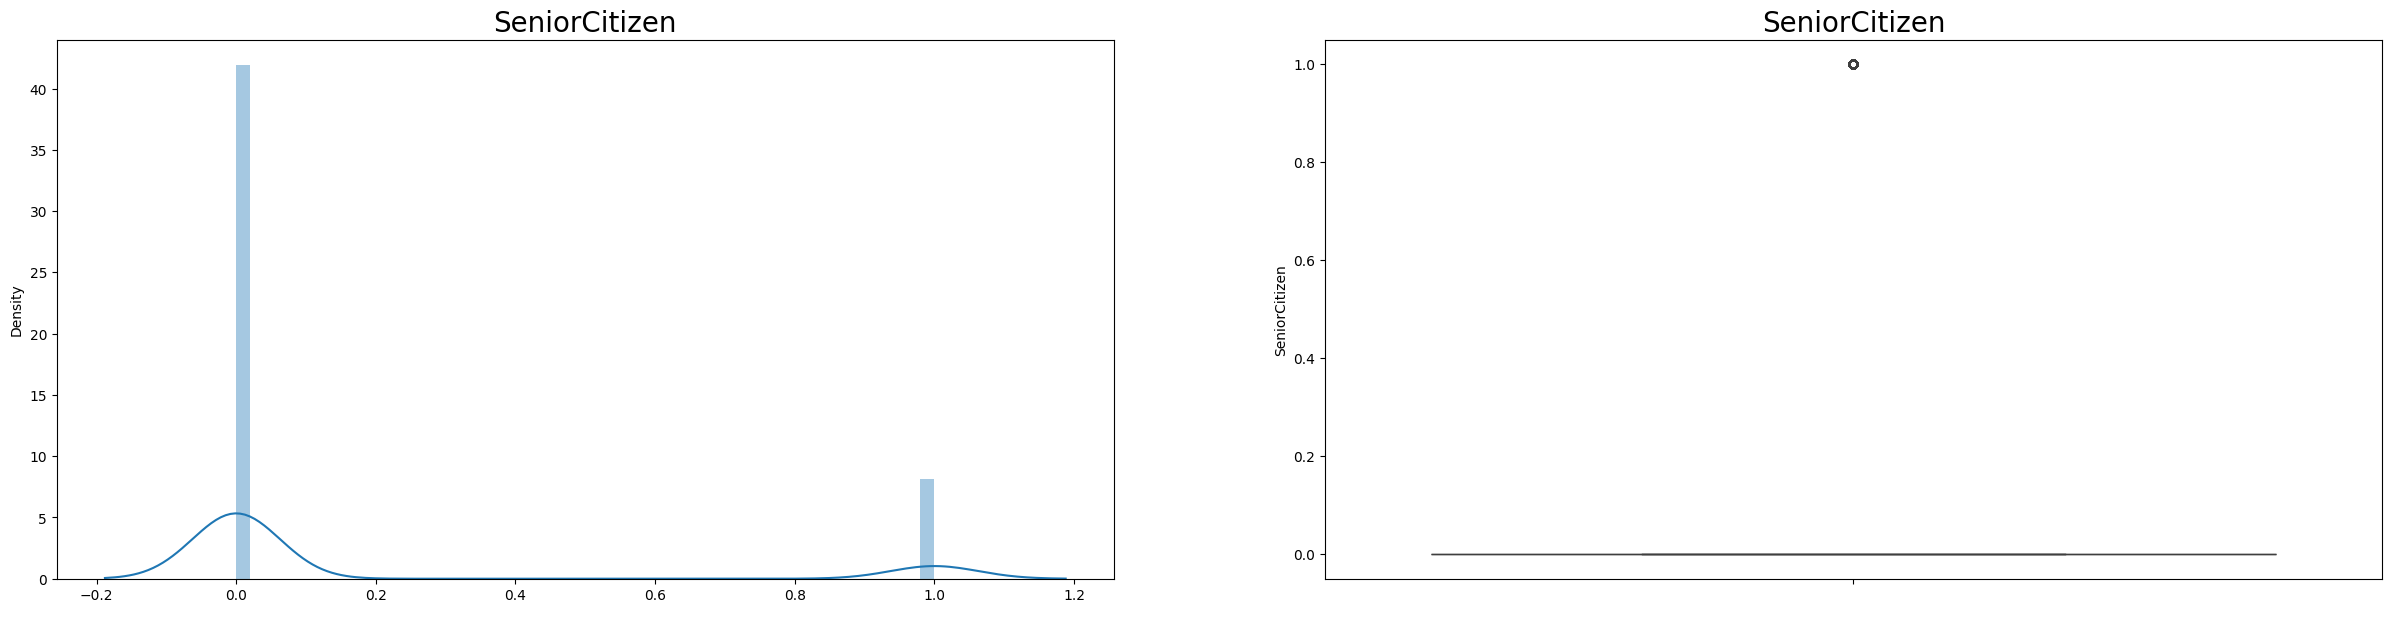

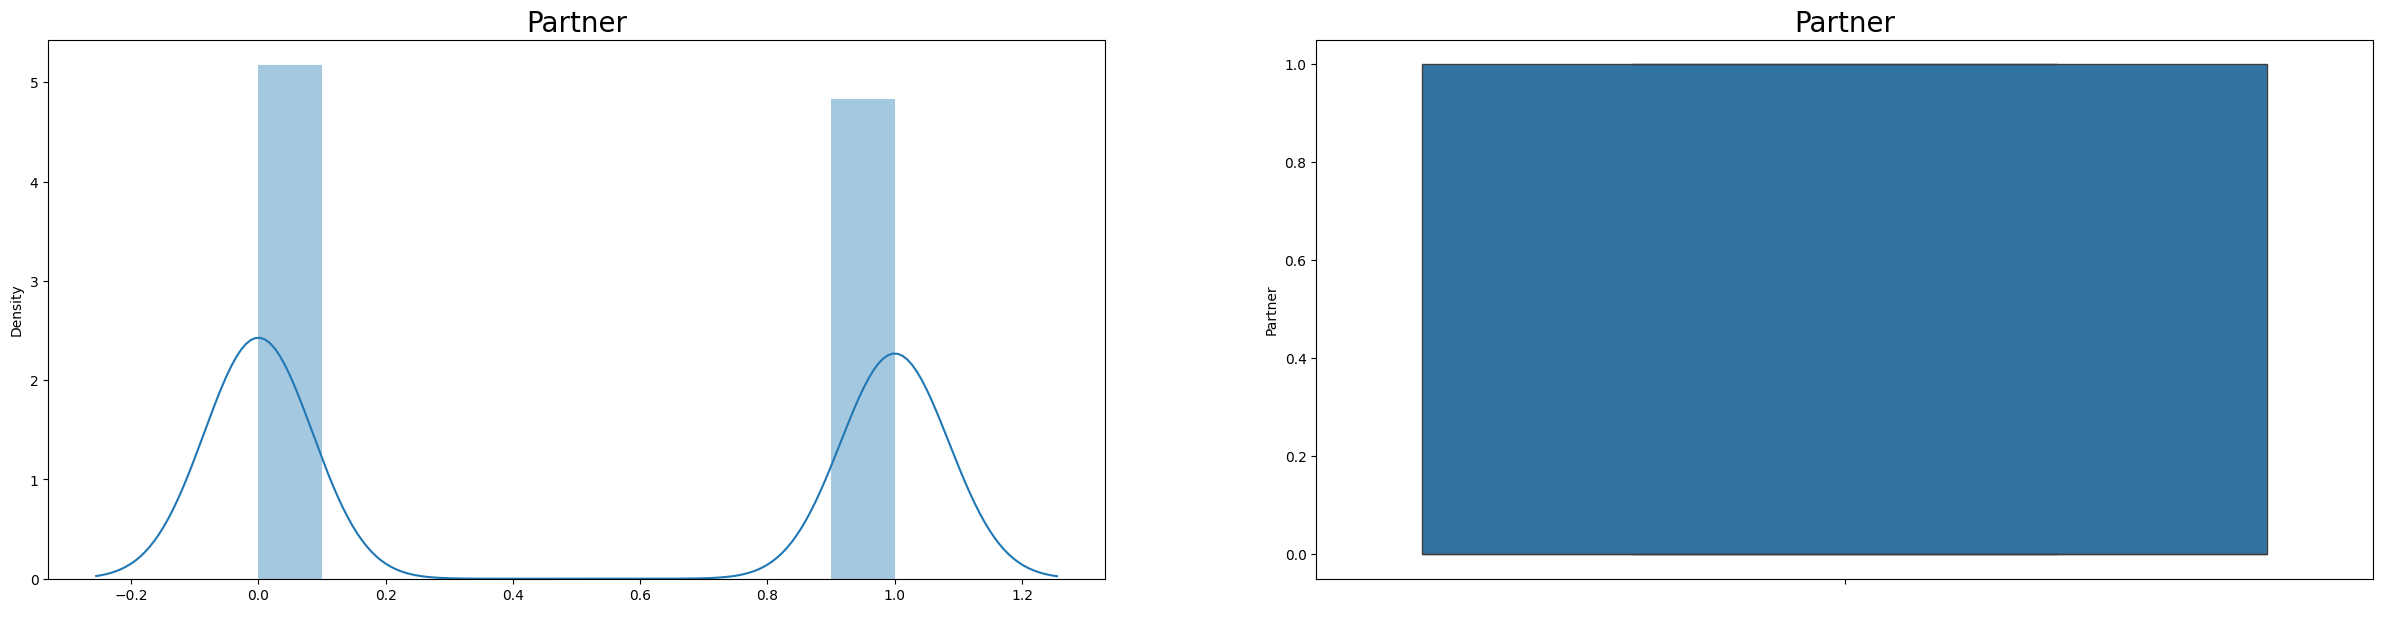

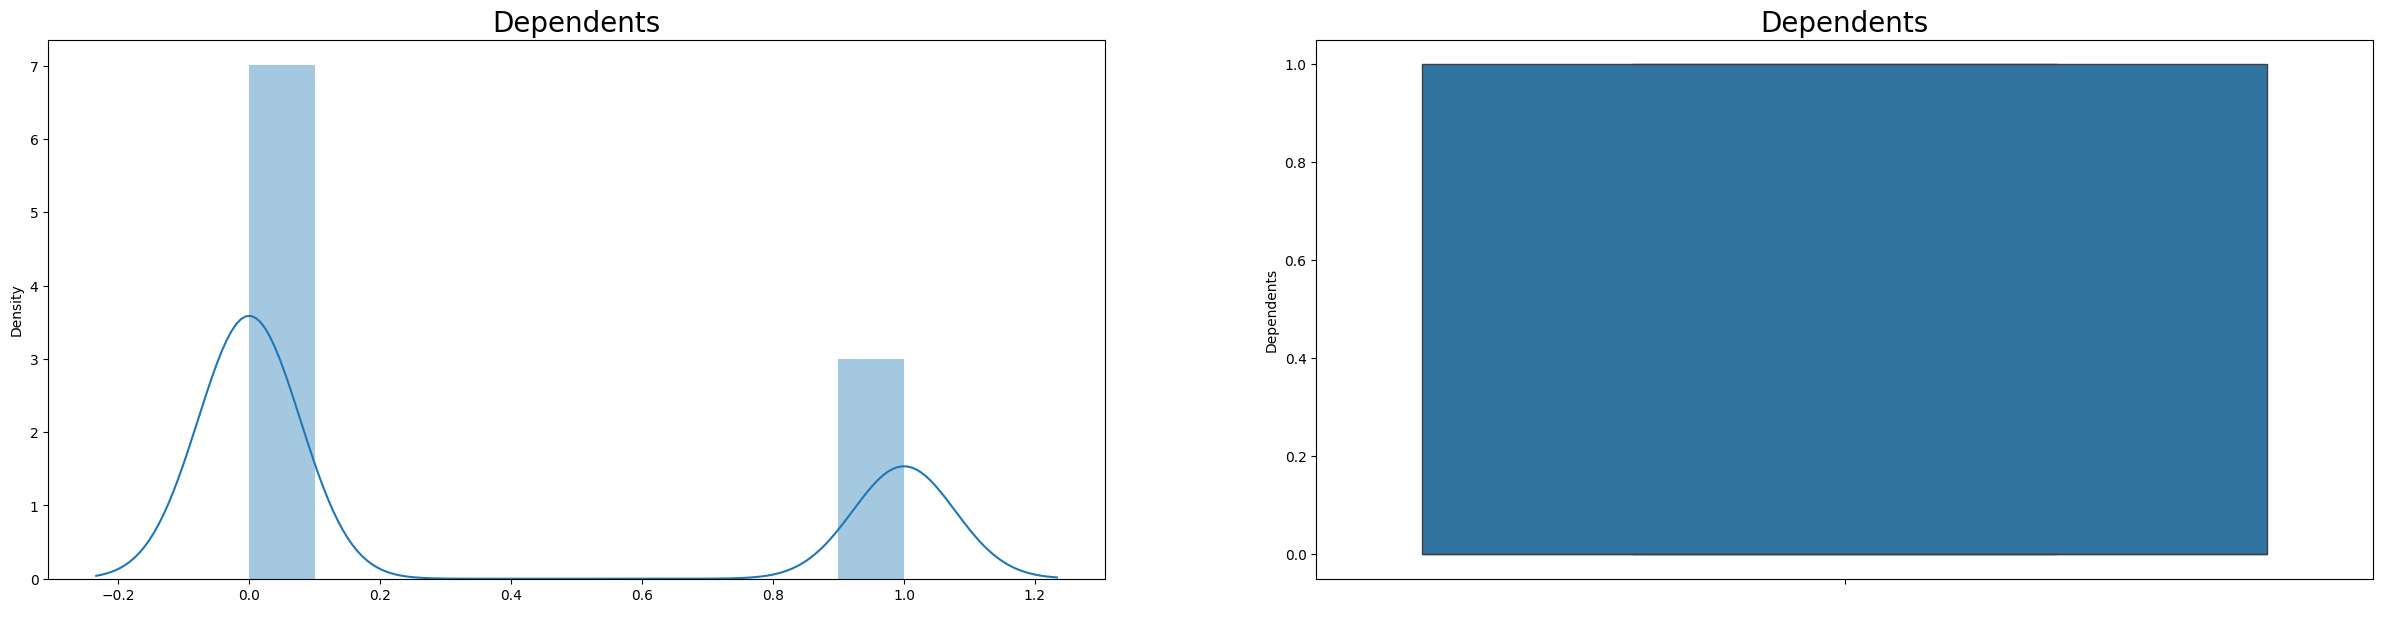

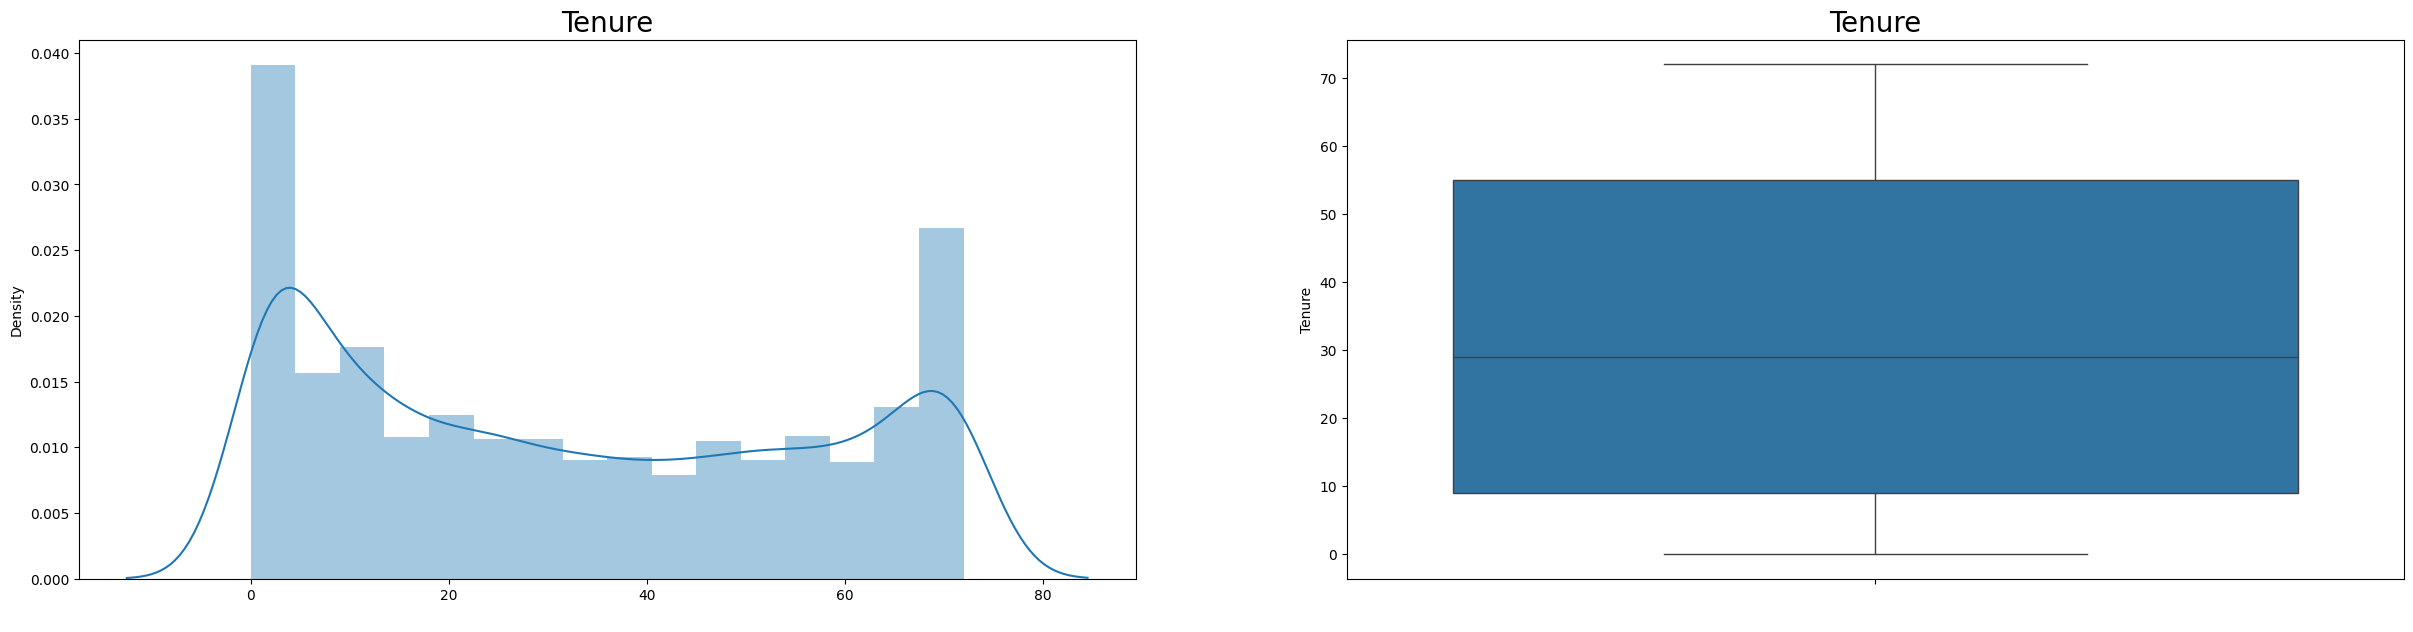

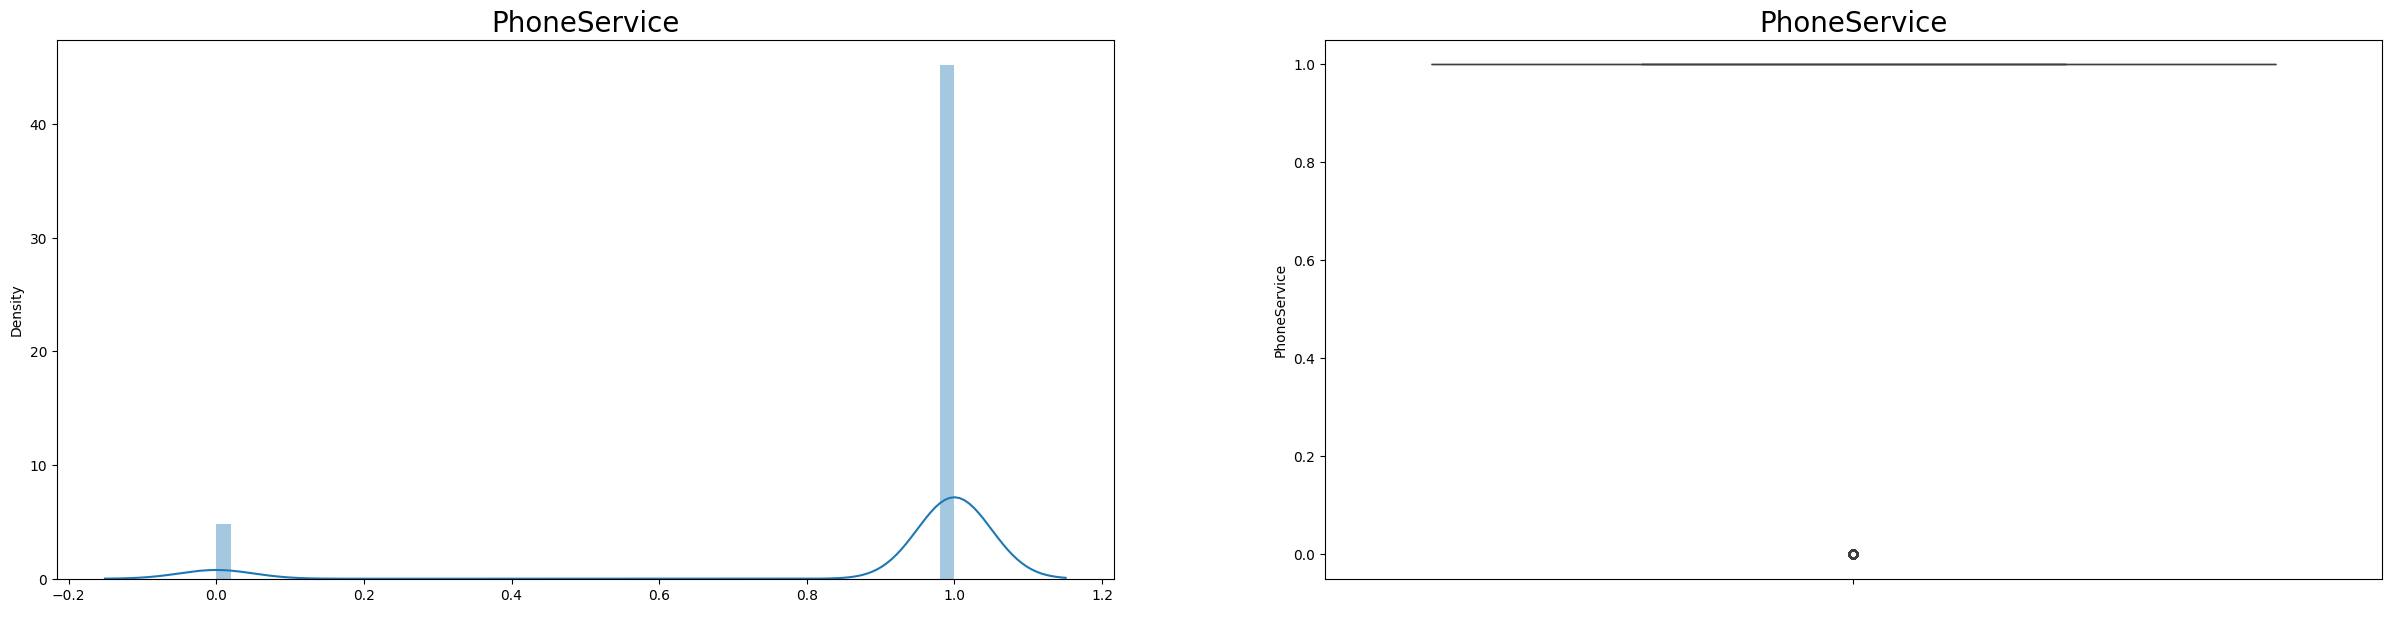

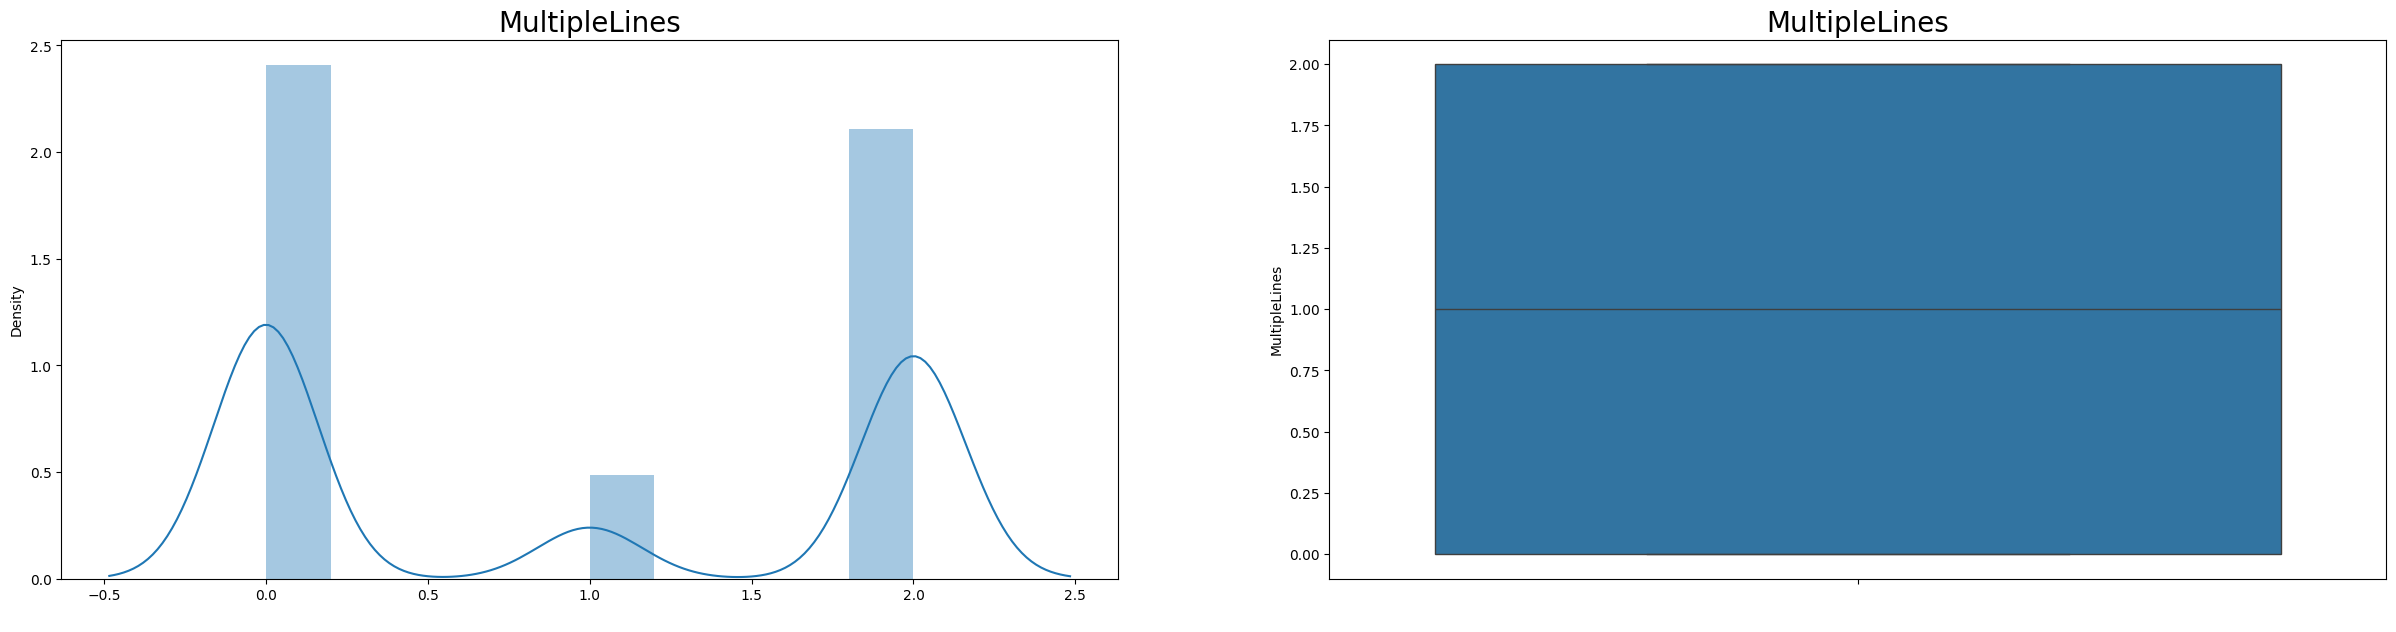

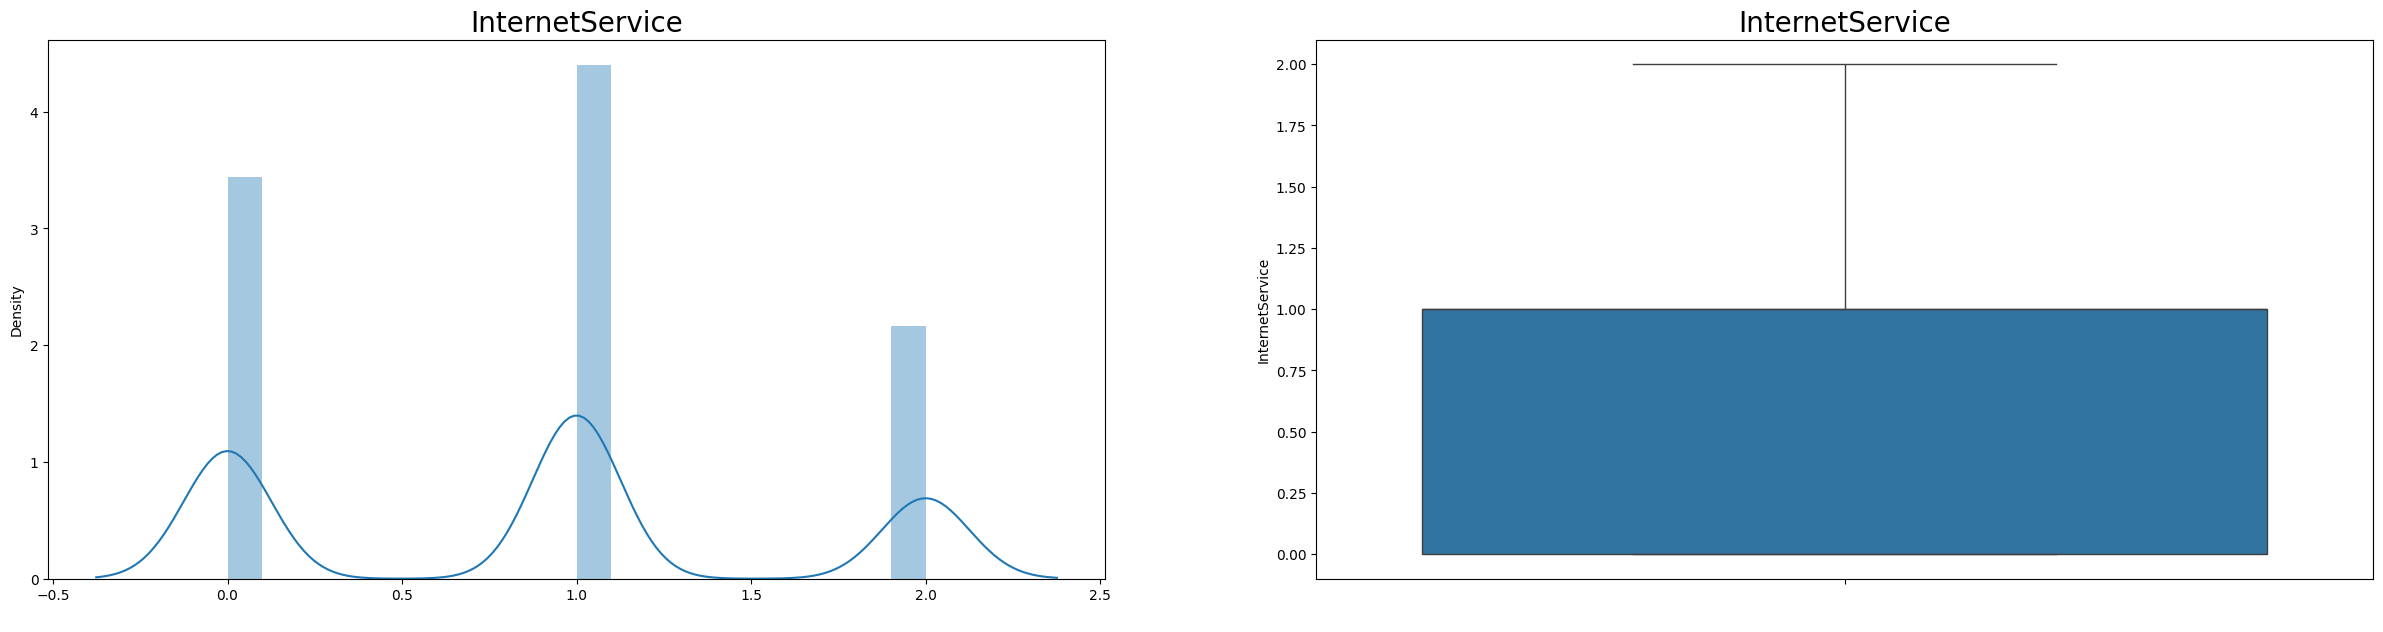

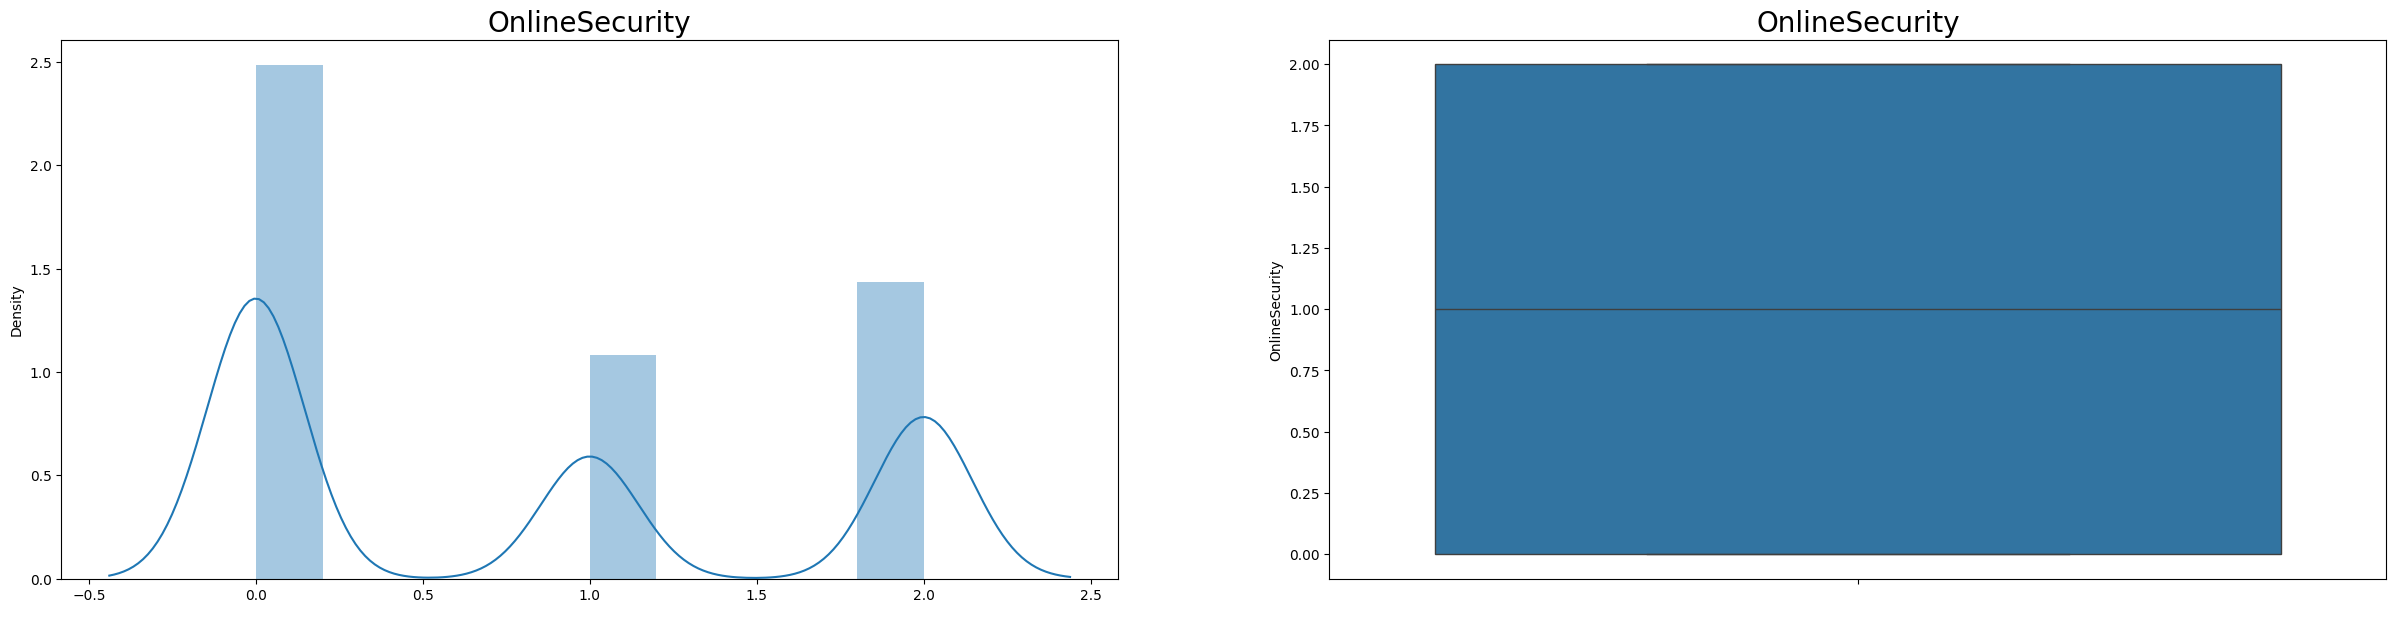

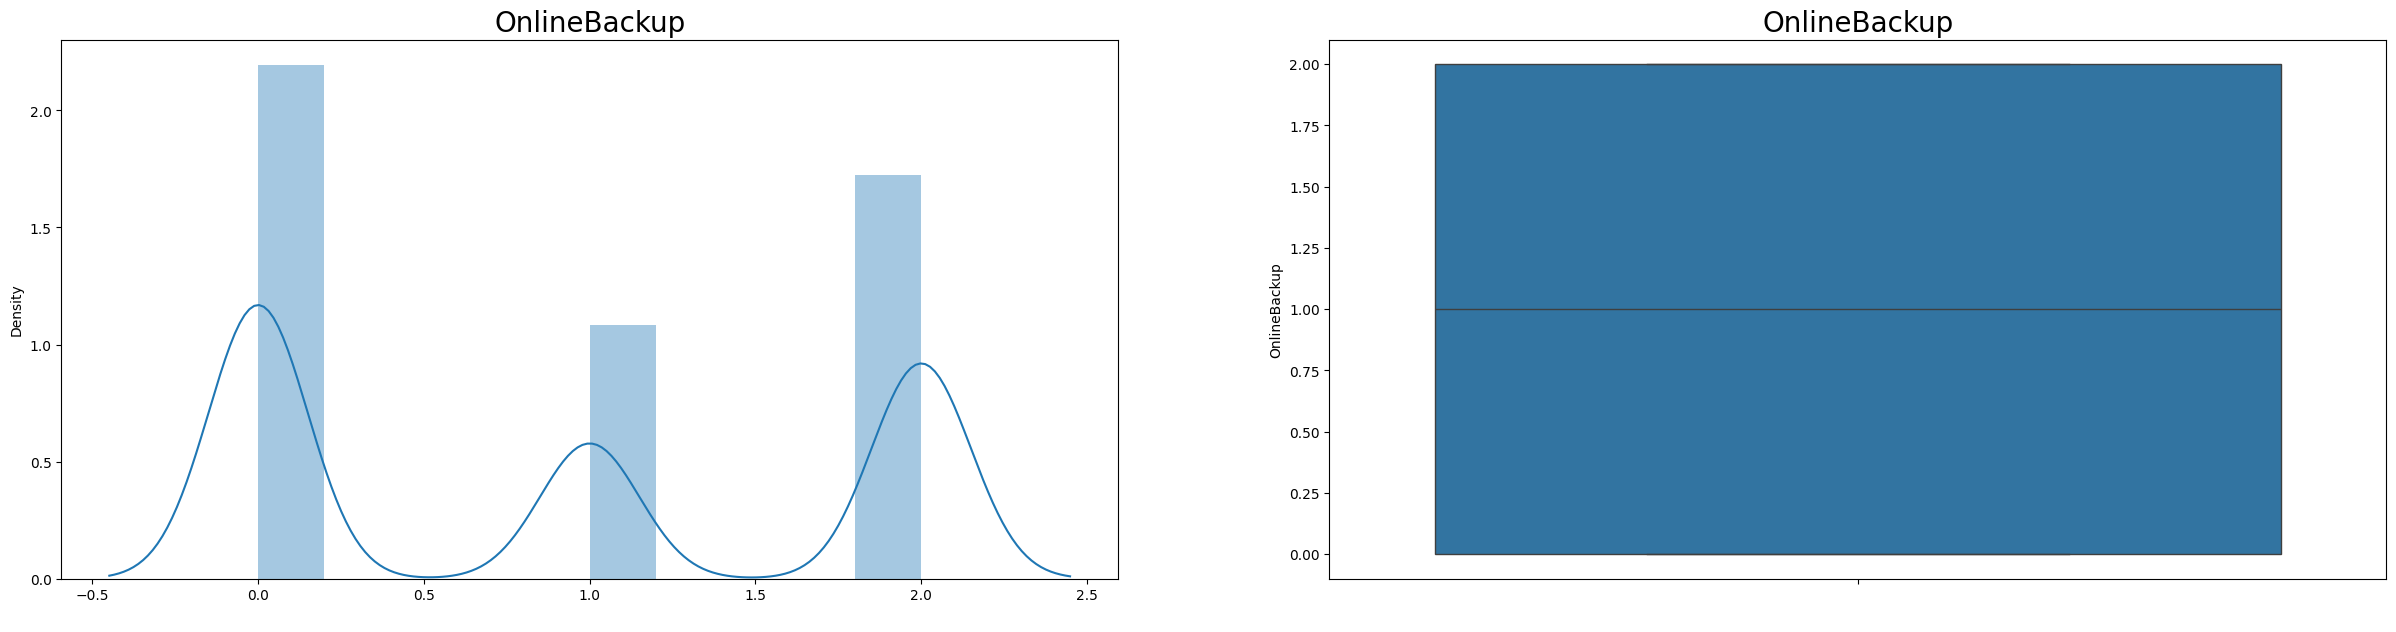

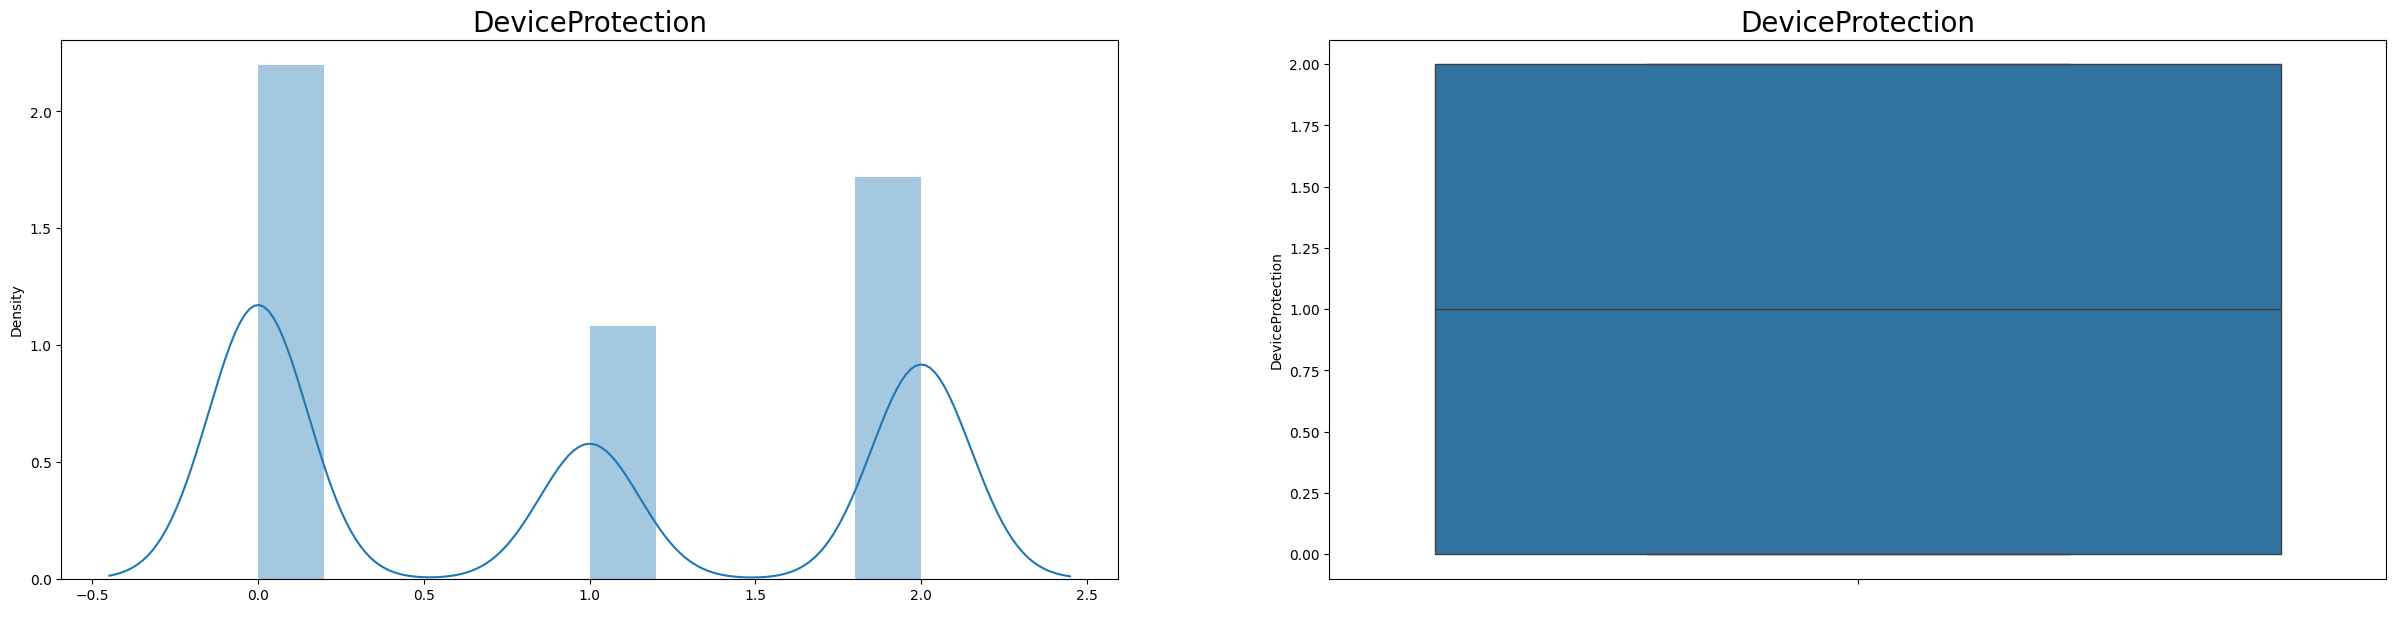

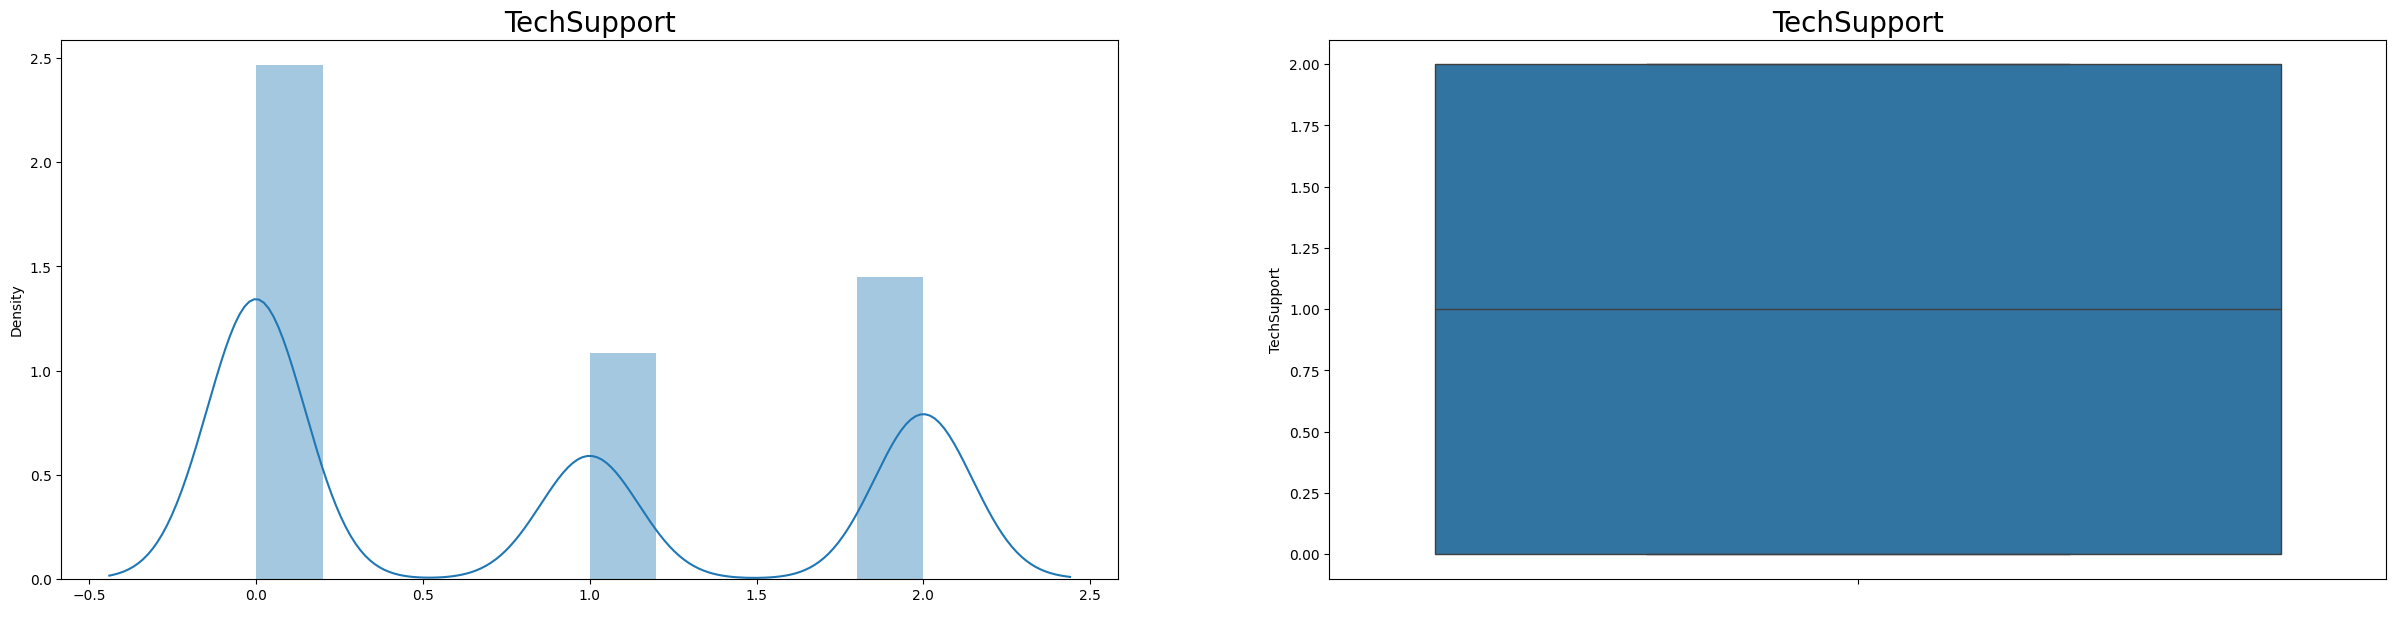

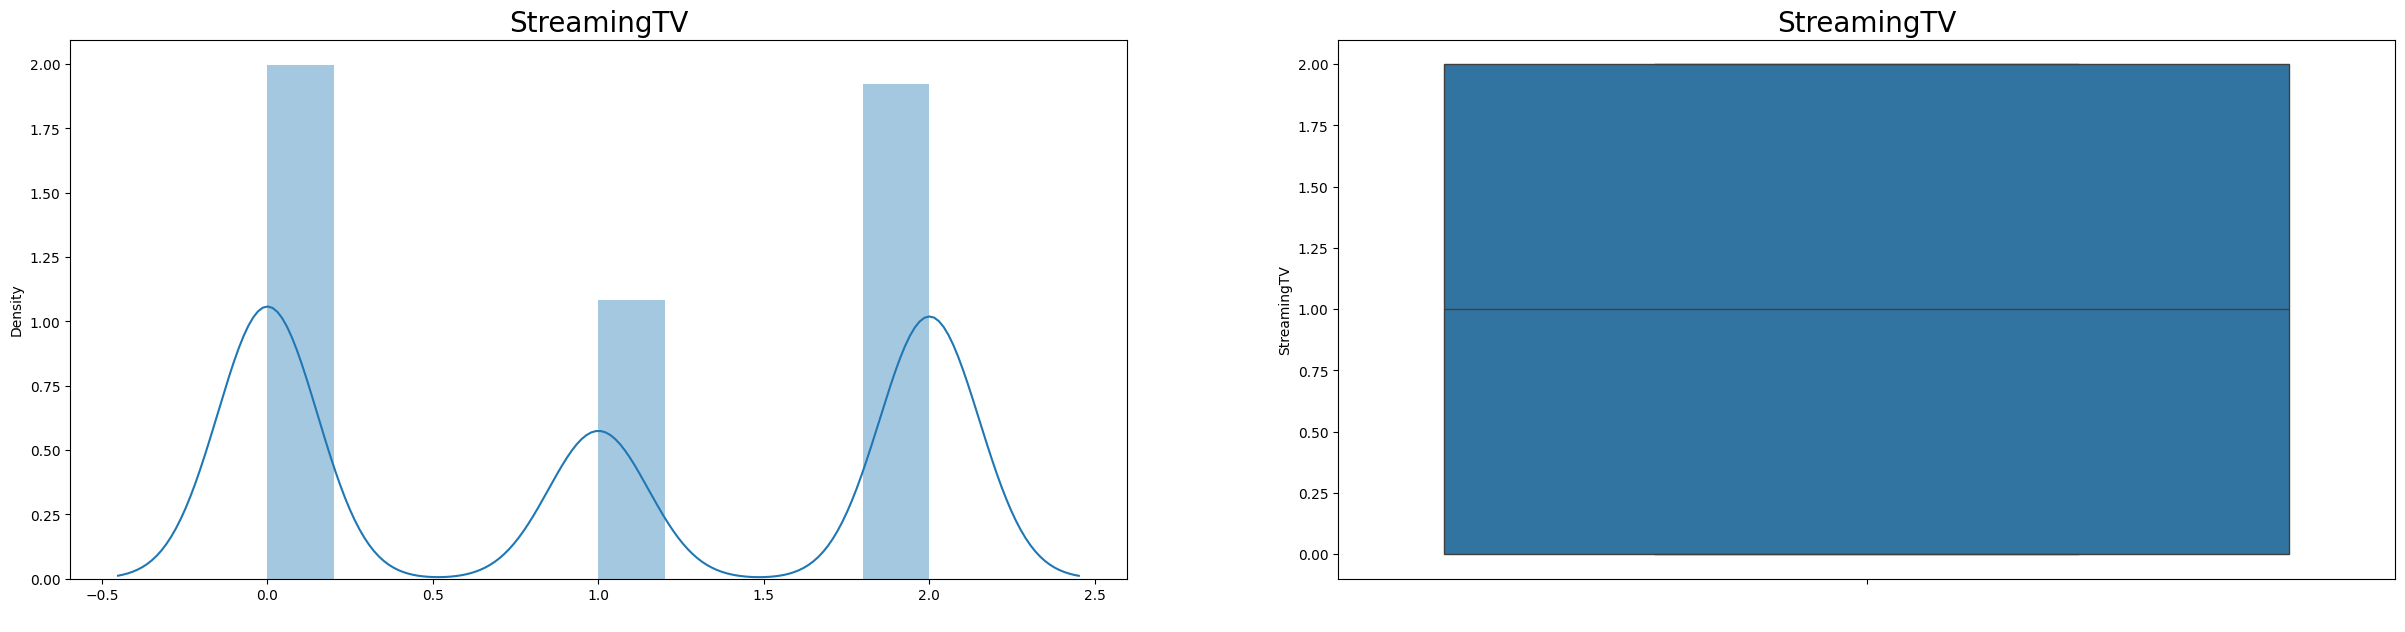

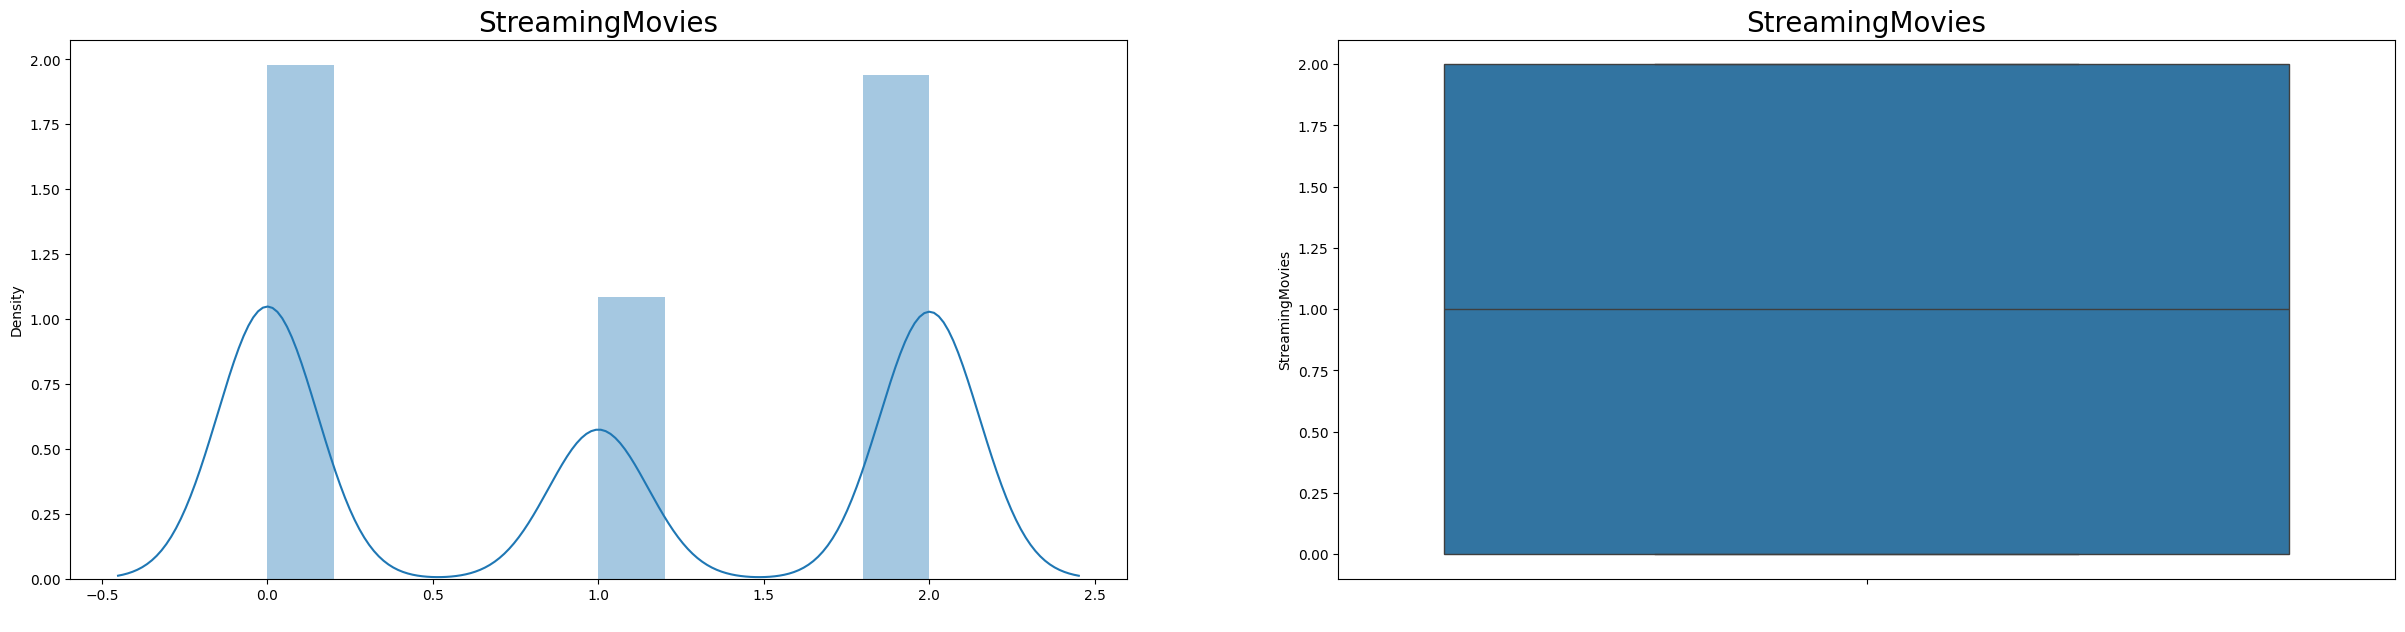

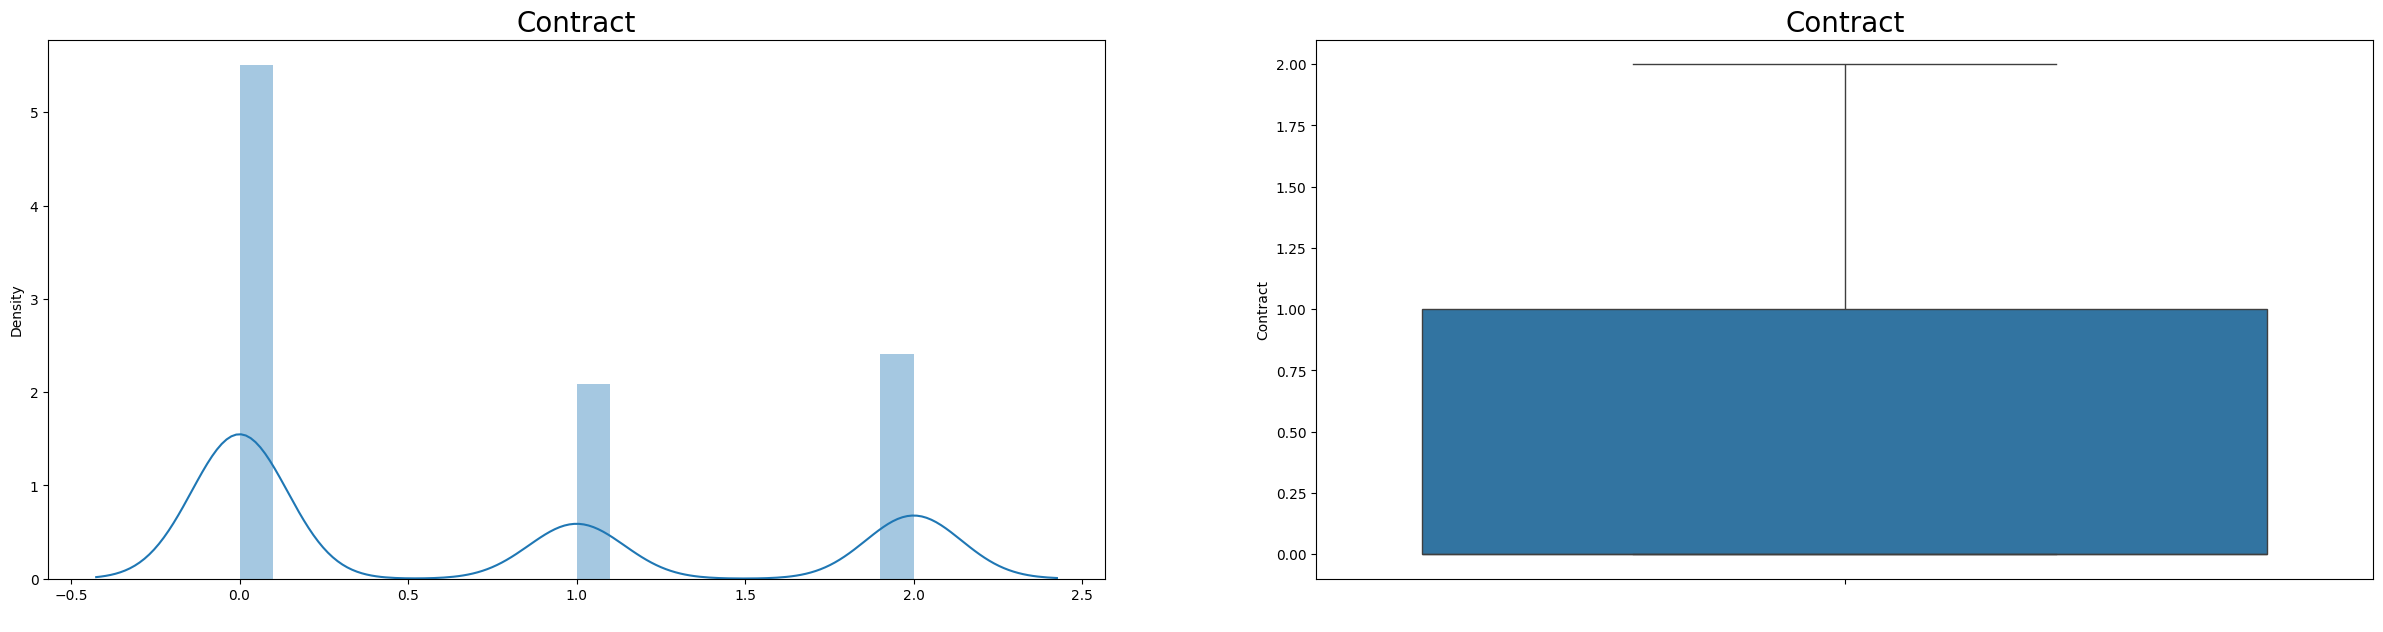

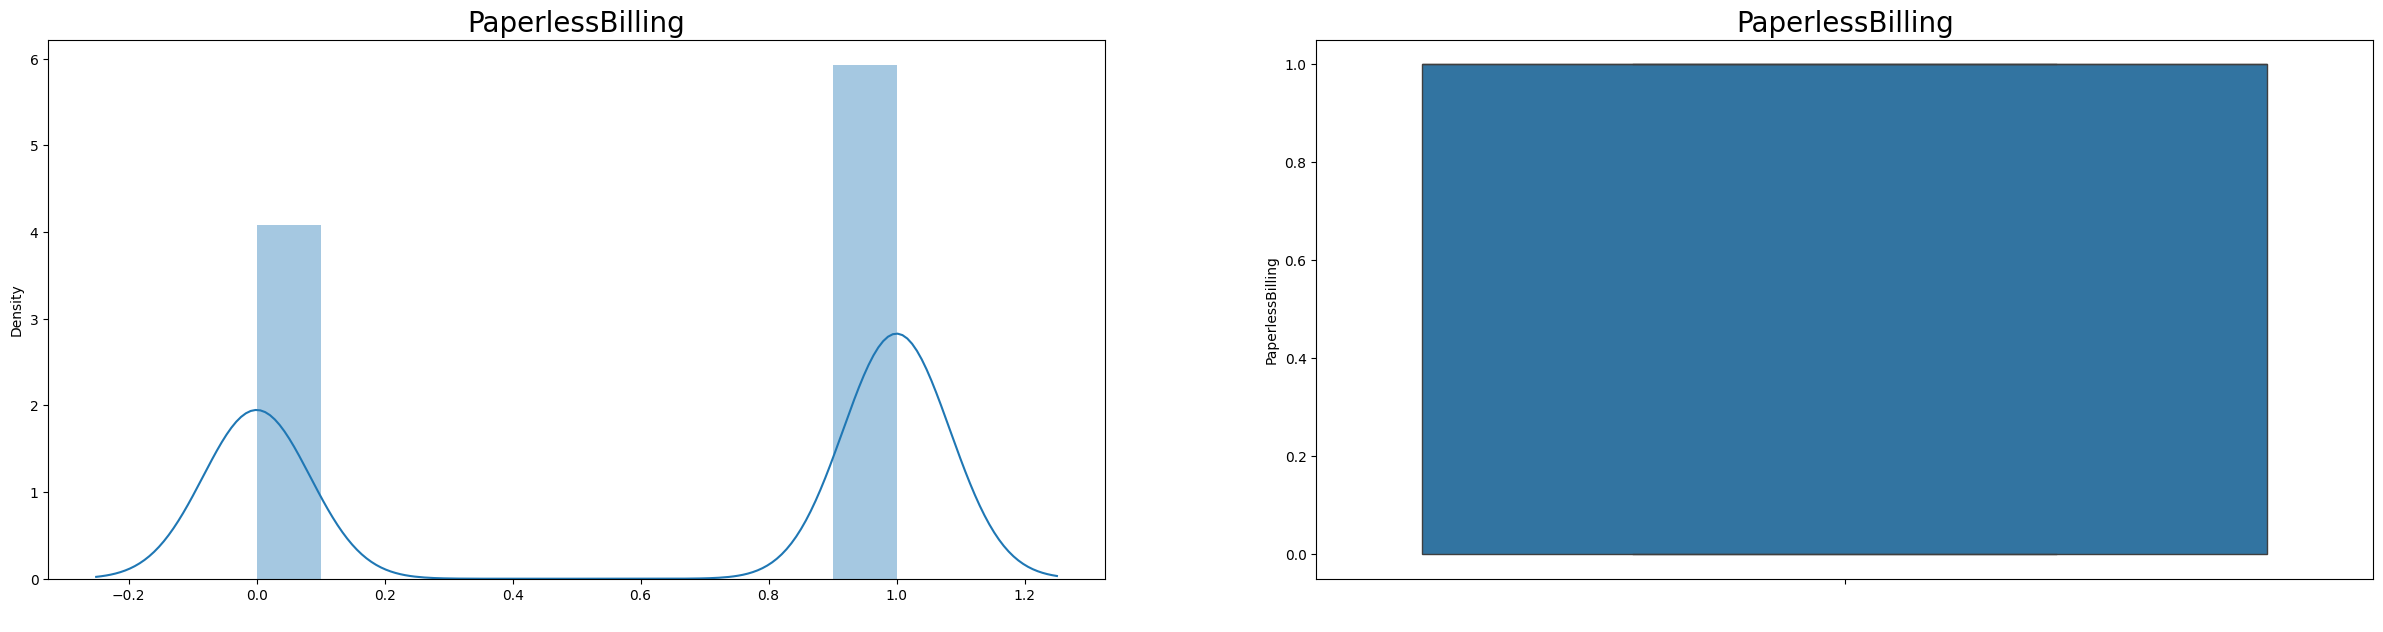

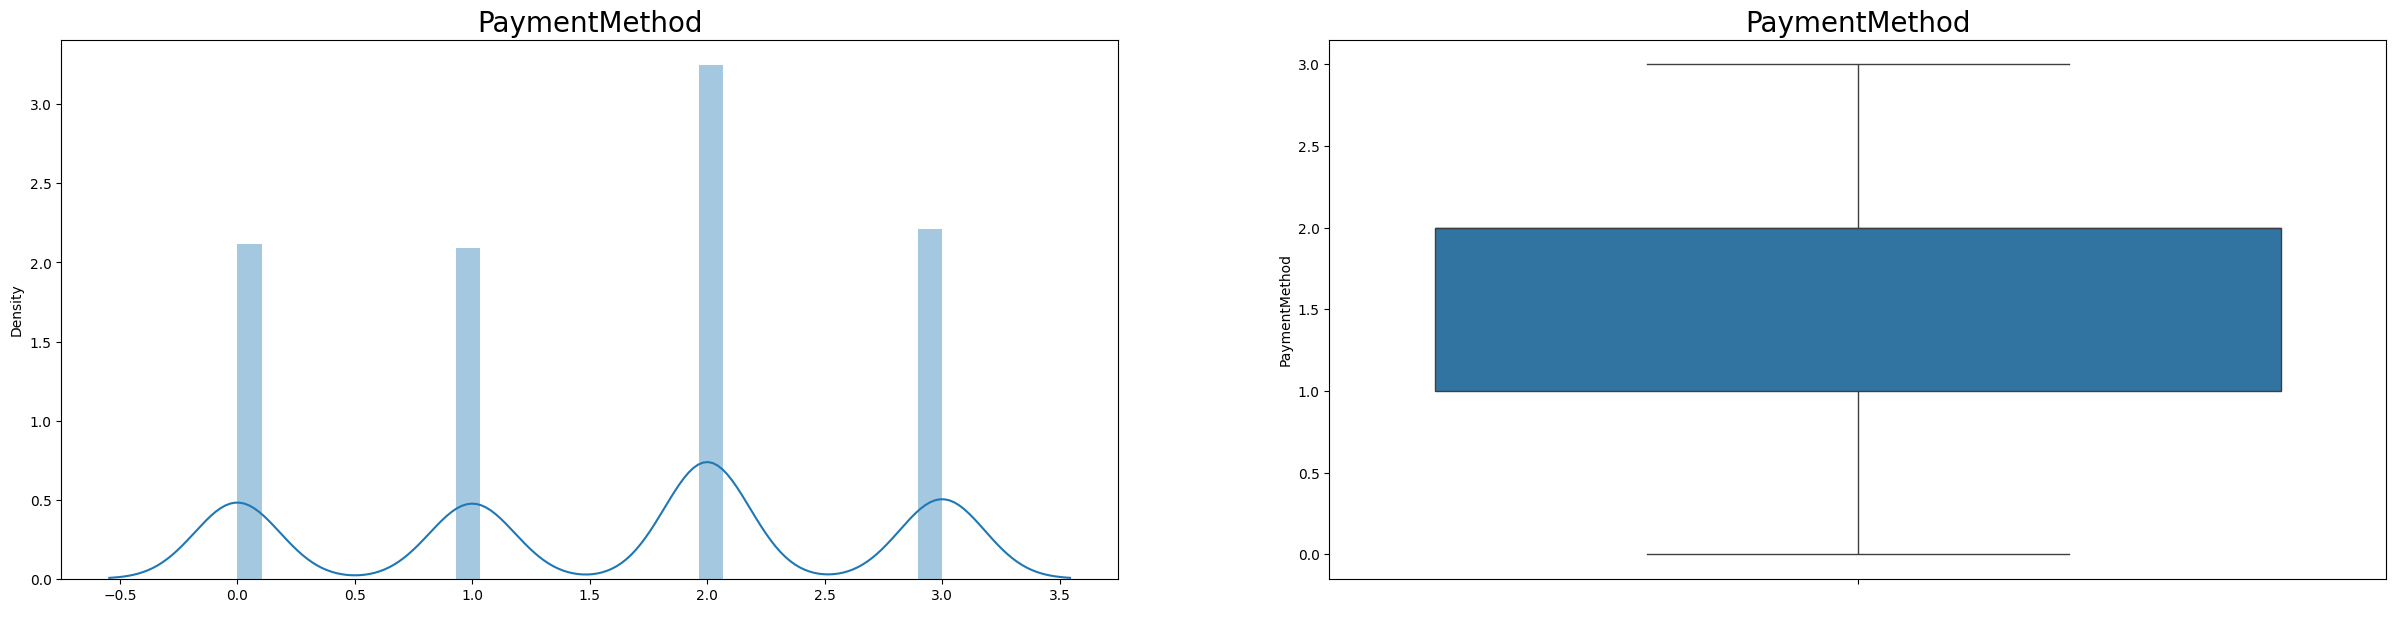

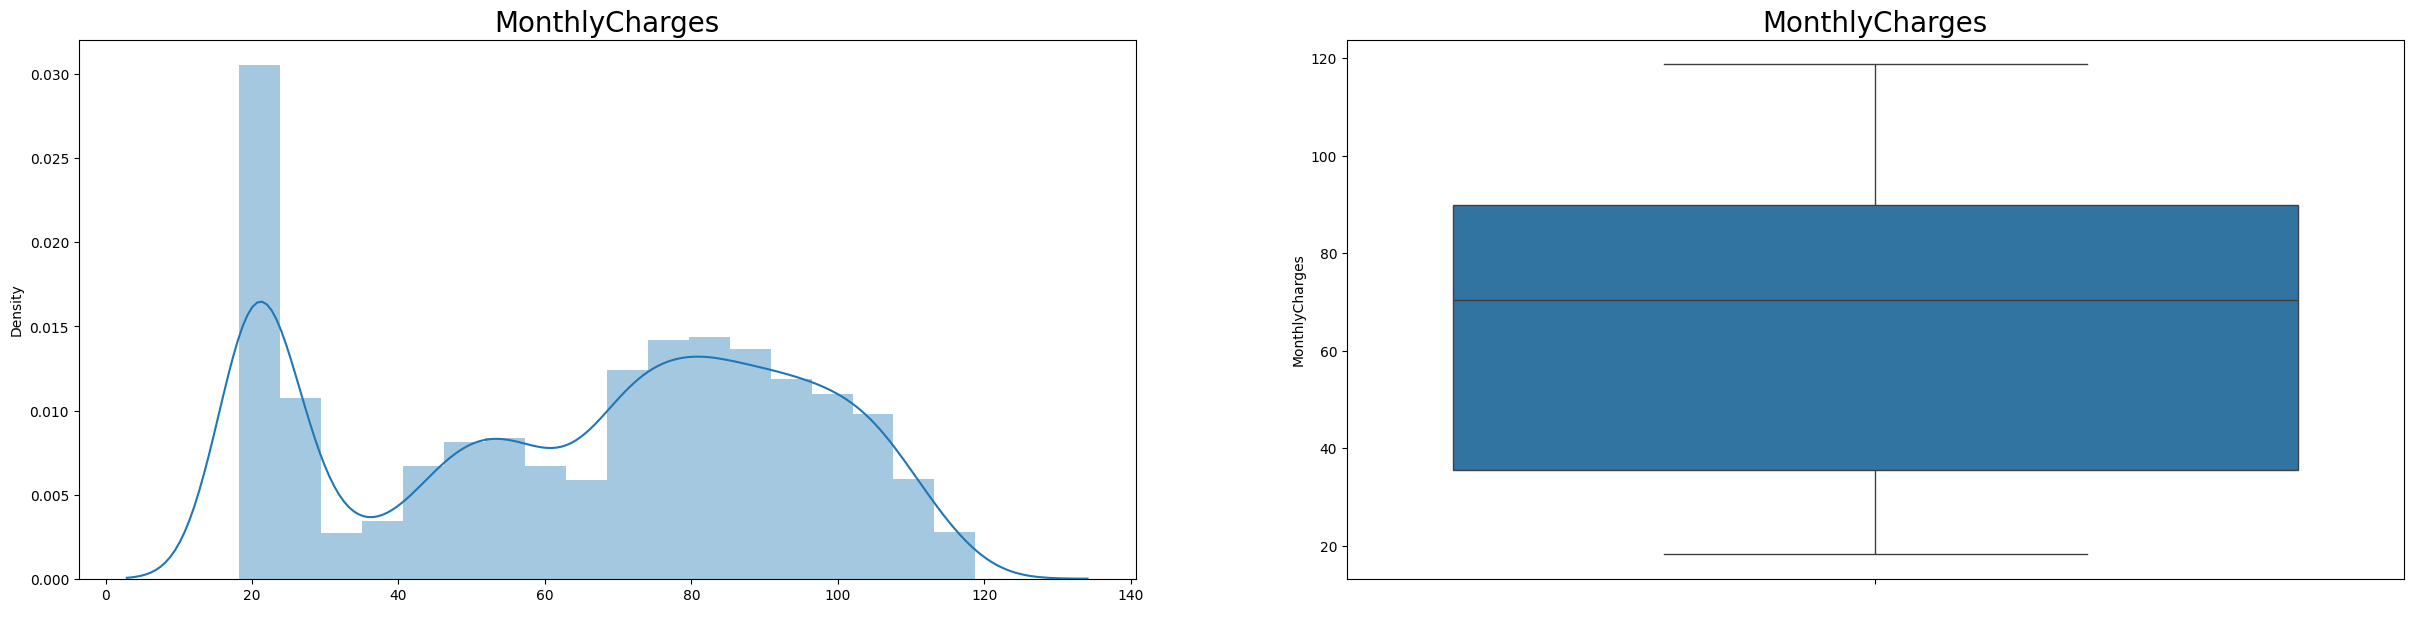

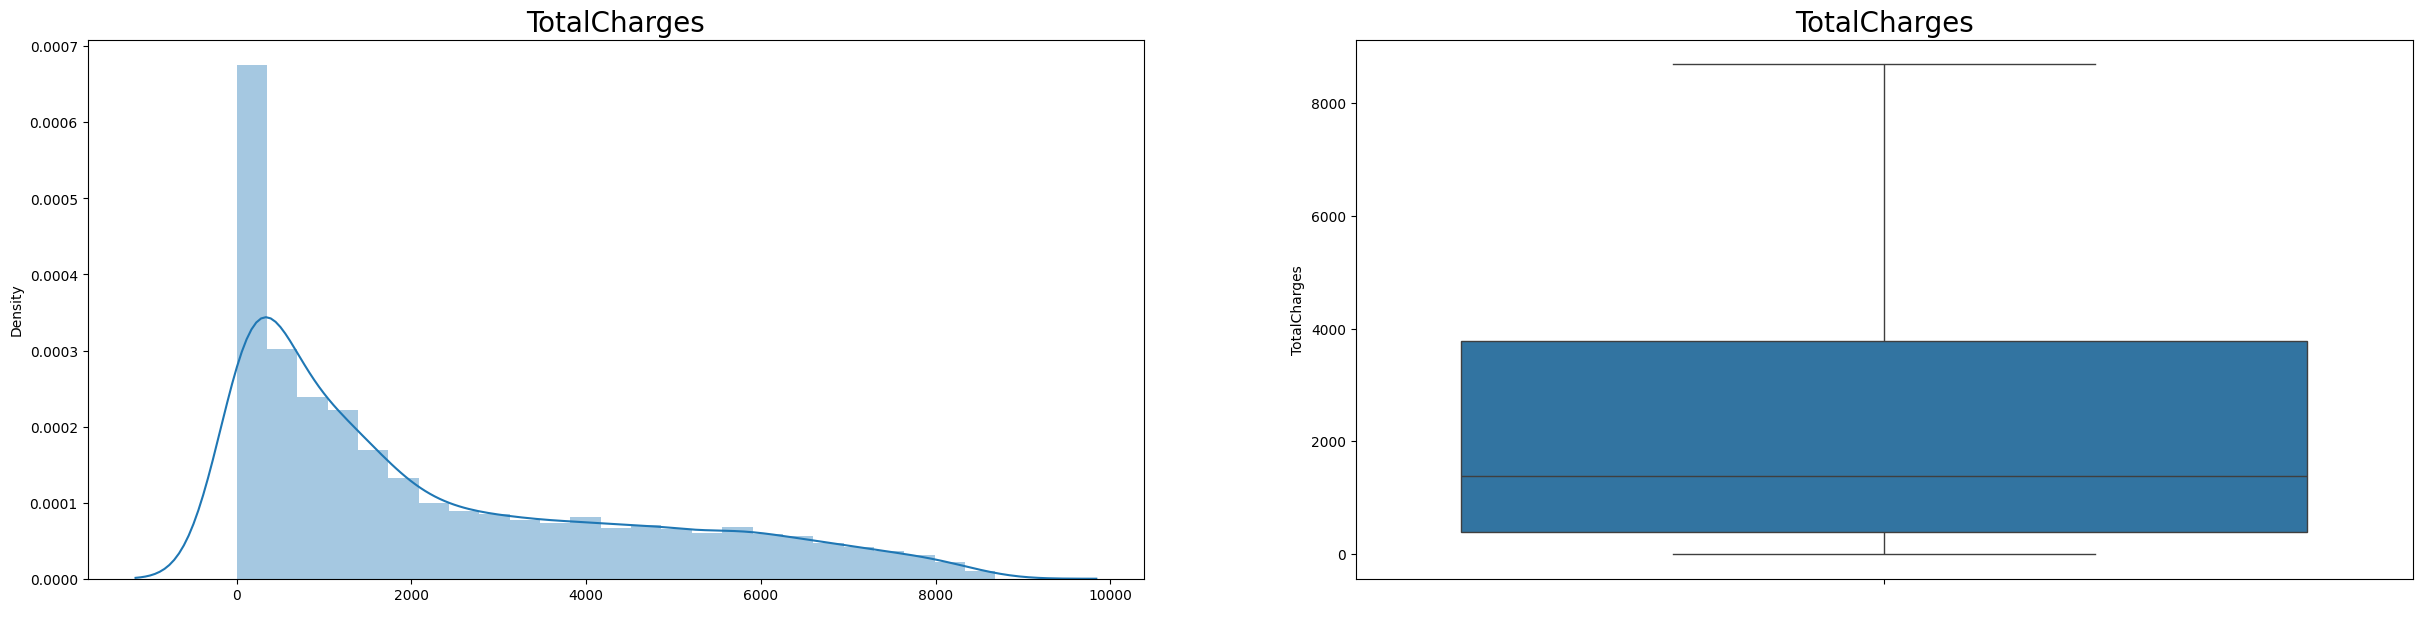

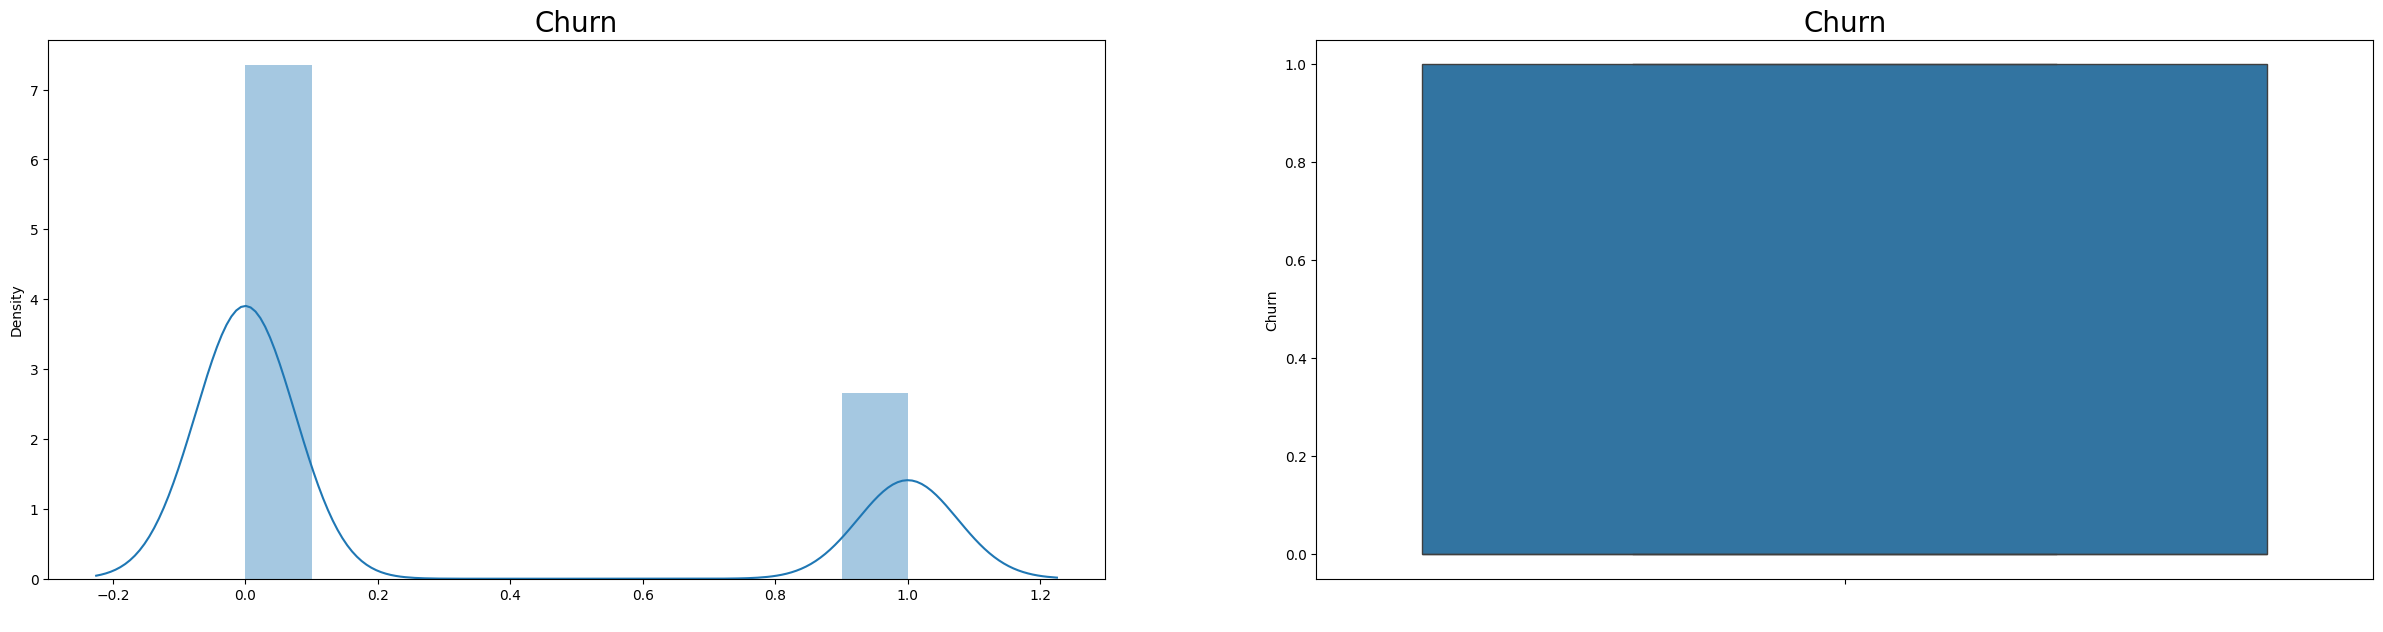

In [126]:
data1_columns = df1.columns
data1_columns
# Gives us the distribution and boxplot for all the columns.
for index,col in enumerate(data1_columns):
    plt.figure(figsize = (30,7))
    plt.subplot(1,2,1)
    sns.distplot(df1[col])
    plt.xlabel(" ")
    plt.title(col, size = 20)

    plt.subplot(1,2,2)
    sns.boxplot(y = df1[col])
    plt.title(col, size = 20)
    plt.show()

# Checking Skewness of variables

In [127]:
df1.skew()

Gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
Tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963229
Churn               1.063031
dtype: float64

In [128]:
skewness = df1.skew()
skewness
def Level_of_skewness(s):
    if s > 1 or s < -1:
        return 'Highly Skewed'
    elif s > 0.5 or s<-0.5:
        return 'Moderately Skewed'
    else:
        return 'Lightly Skewed'

skewness_category = skewness.apply(Level_of_skewness)
print(skewness_category)

Gender                 Lightly Skewed
SeniorCitizen           Highly Skewed
Partner                Lightly Skewed
Dependents          Moderately Skewed
Tenure                 Lightly Skewed
PhoneService            Highly Skewed
MultipleLines          Lightly Skewed
InternetService        Lightly Skewed
OnlineSecurity         Lightly Skewed
OnlineBackup           Lightly Skewed
DeviceProtection       Lightly Skewed
TechSupport            Lightly Skewed
StreamingTV            Lightly Skewed
StreamingMovies        Lightly Skewed
Contract            Moderately Skewed
PaperlessBilling       Lightly Skewed
PaymentMethod          Lightly Skewed
MonthlyCharges         Lightly Skewed
TotalCharges        Moderately Skewed
Churn                   Highly Skewed
dtype: object


Observation:
- Senior Citizen and  PhoneService are highly skewed data whereas

In [129]:
df2=df1.copy() #copying data before removing skewness

In [130]:
skewness = df2.skew()
from sklearn.preprocessing import PowerTransformer
# Apply transformations based on skewness
for col in df2.select_dtypes(include=['float64', 'int64']).columns:
    if col == 'Churn':  # Skip the 'Income' column
        continue

    if skewness[col] > 1:  # Apply log transformation for highly skewed data
        df2[col] = df2[col].apply(lambda x: np.log(x) if x > 0 else x)
    elif skewness[col] > 0.5:  # Apply square root transformation for moderately skewed data
        df2[col] = df2[col].apply(lambda x: np.sqrt(x) if x >= 0 else x)
    elif skewness[col] < -0.5:  # Apply Yeo-Johnson for negatively skewed data
        pt = PowerTransformer(method='yeo-johnson')
        df2[[col]] = pt.fit_transform(df2[[col]])

# Recalculate skewness after transformation
skewness = df2.skew()
skewness

Gender             -0.019031
SeniorCitizen       0.000000
Partner             0.067922
Dependents          0.875199
Tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.344639
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.307130
Churn               1.063031
dtype: float64

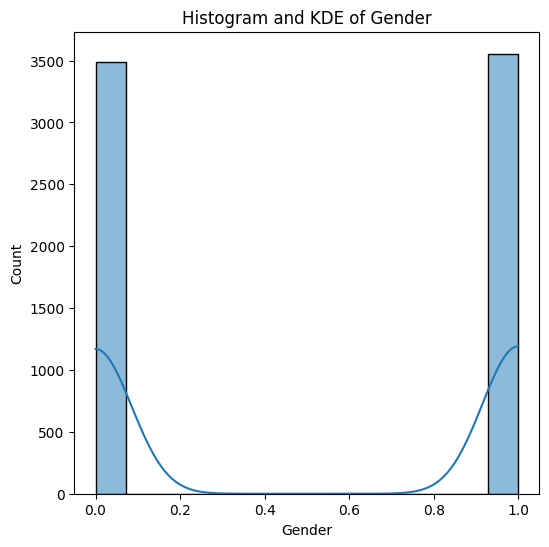

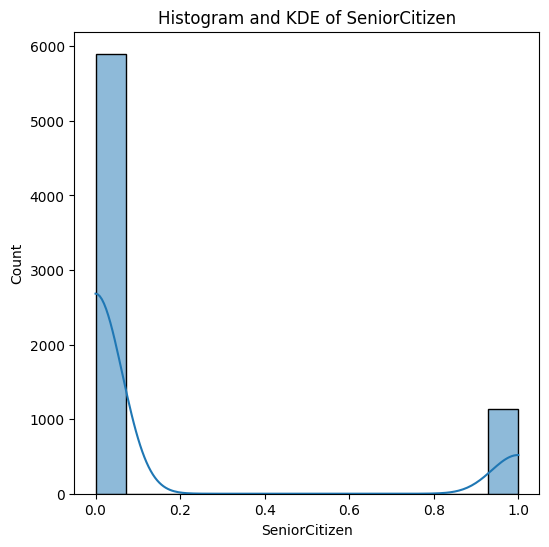

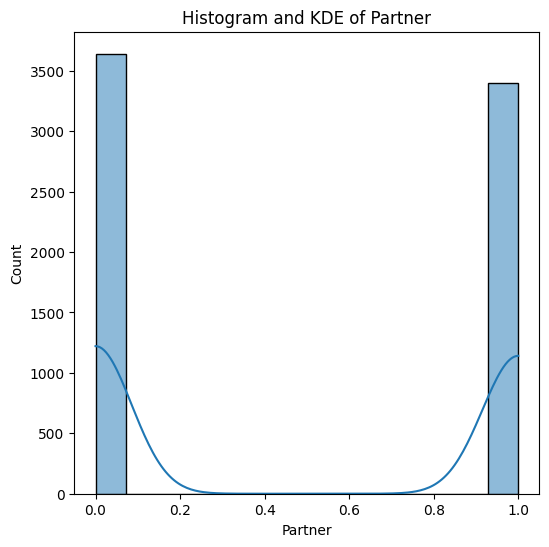

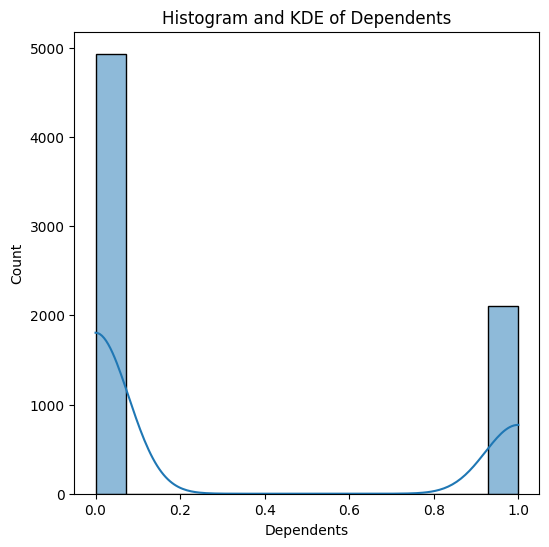

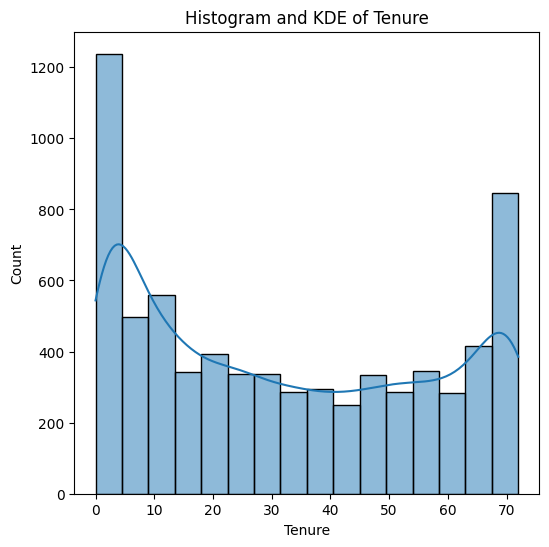

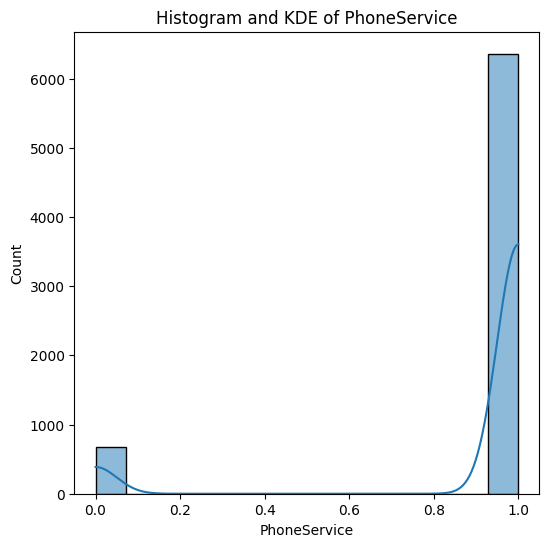

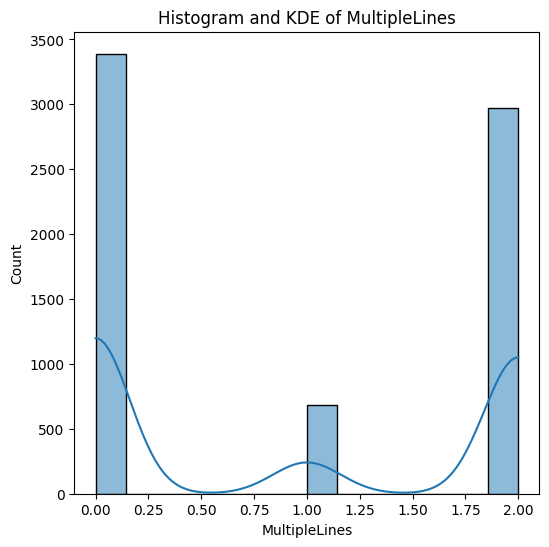

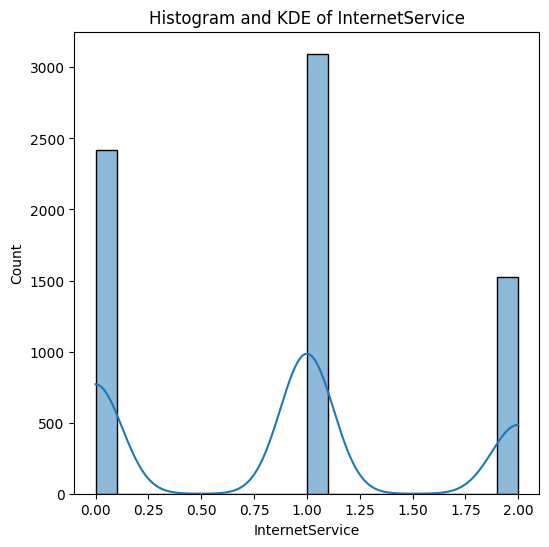

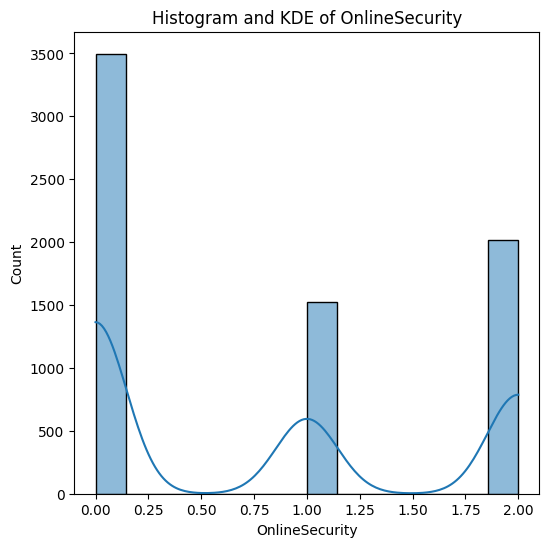

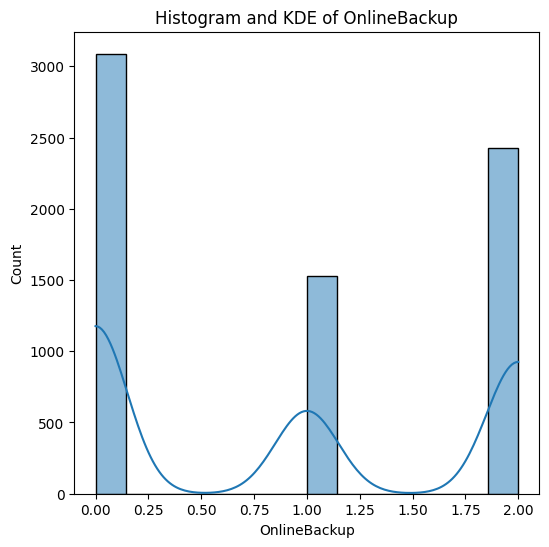

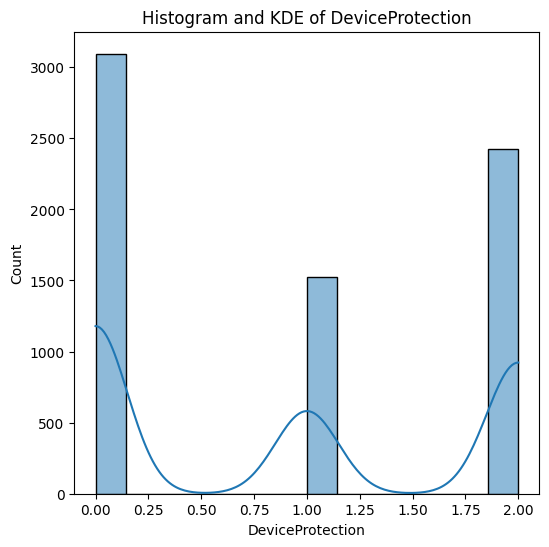

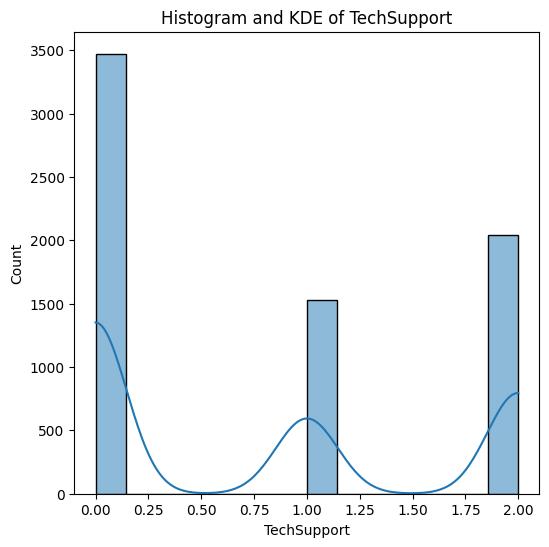

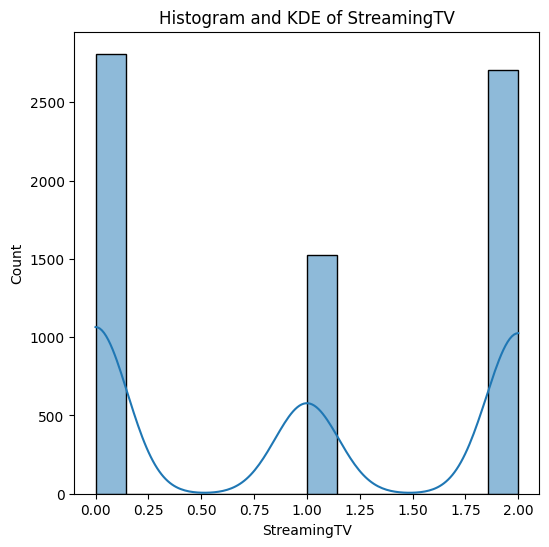

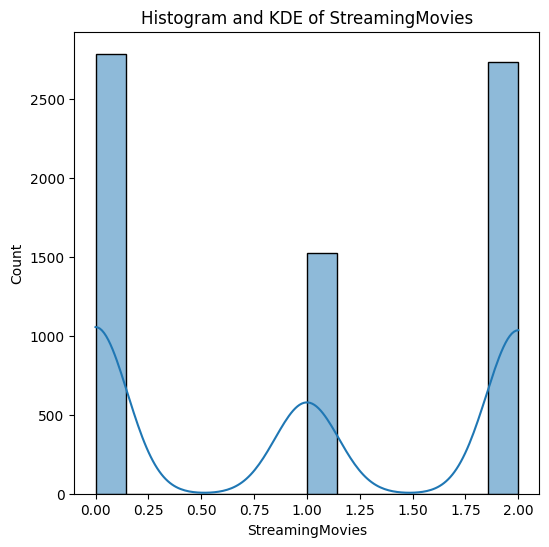

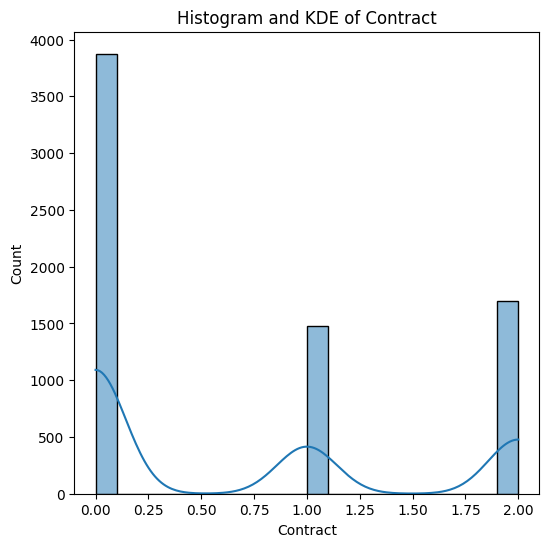

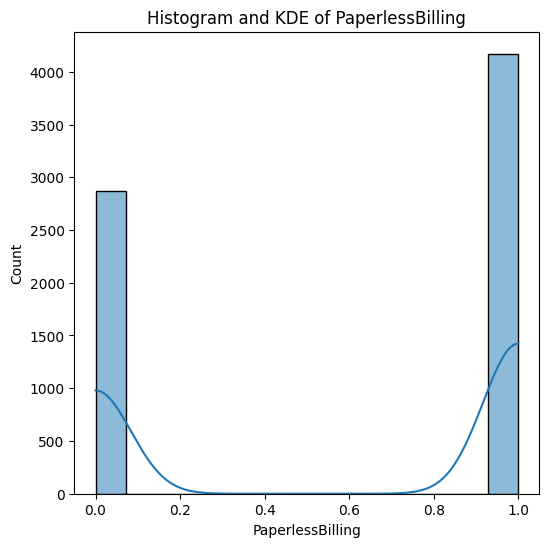

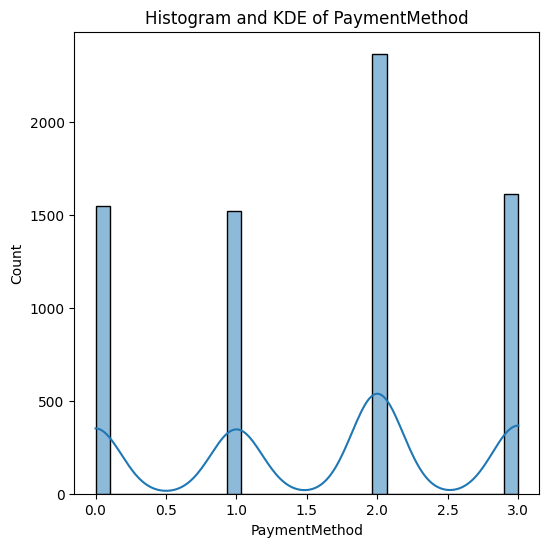

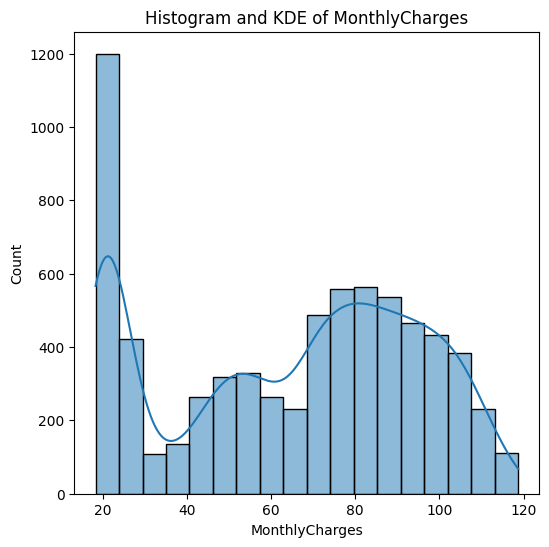

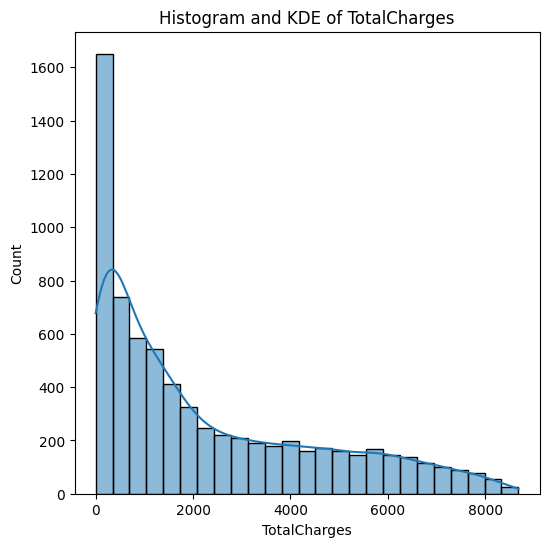

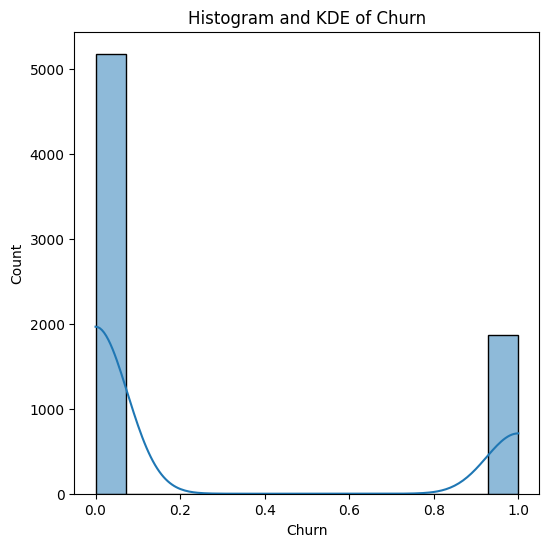

In [131]:
for col in df2.columns:
    plt.figure(figsize=(6, 6))
    sns.histplot(df1[col], kde=True)
    plt.title(f'Histogram and KDE of {col}')
    plt.show()

# Checking Outliers

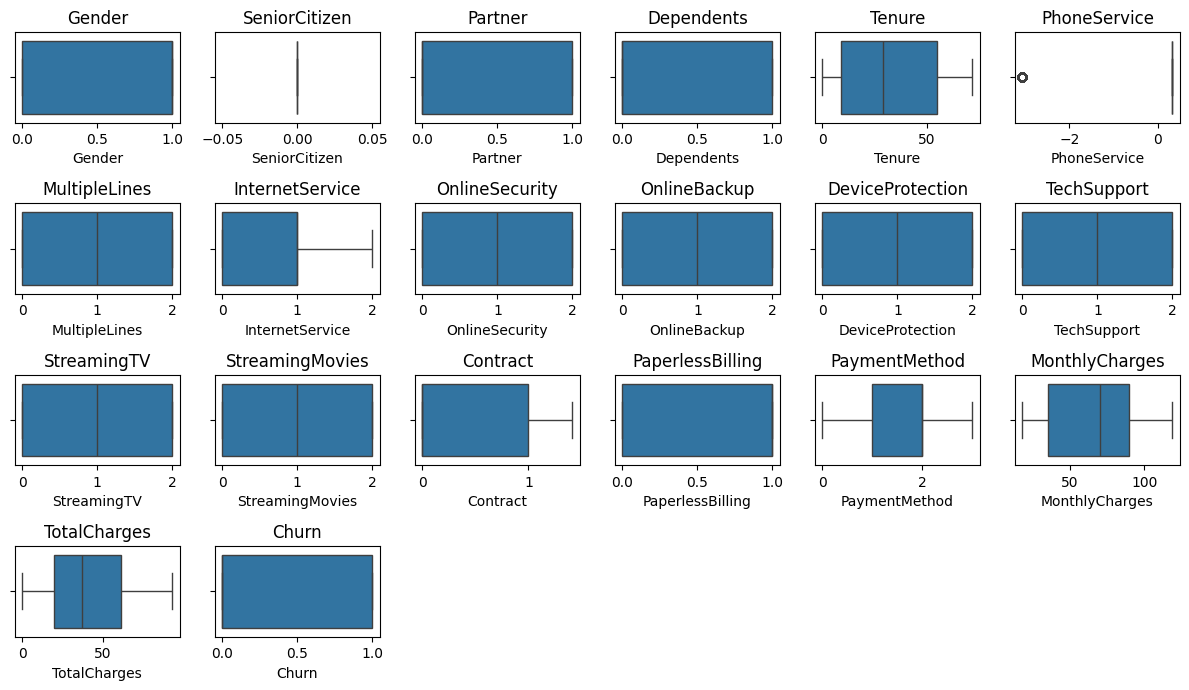

In [132]:
plt.figure(figsize=(12, 10))

for col in df2.columns:
    plt.subplot(6, 6, df2.columns.get_loc(col) + 1)
    sns.boxplot(x=df2[col])
    plt.title(col)

plt.tight_layout()
plt.show()

No outliers found in column: Gender
No outliers found in column: SeniorCitizen
No outliers found in column: Partner
No outliers found in column: Dependents
No outliers found in column: Tenure


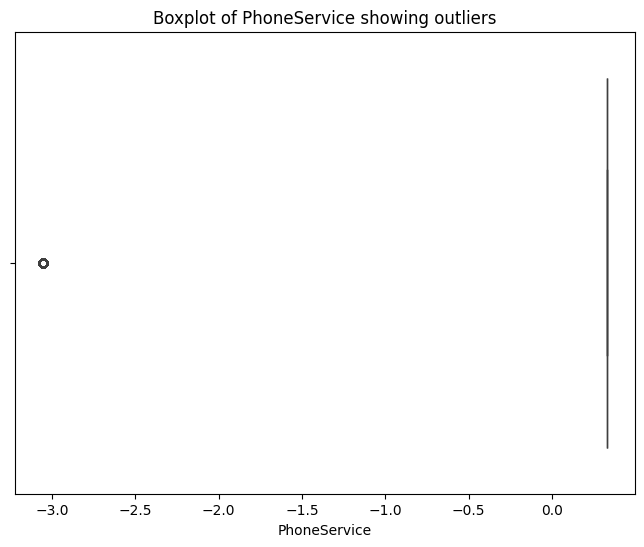

Number of outliers in PhoneService: 682
      Gender  SeniorCitizen  Partner  Dependents  Tenure  PhoneService  \
0          0            0.0        1         0.0       1      -3.05401   
3          1            0.0        0         0.0      45      -3.05401   
7          0            0.0        0         0.0      10      -3.05401   
20         1            0.0        0         0.0       1      -3.05401   
27         1            0.0        1         1.0       1      -3.05401   
...      ...            ...      ...         ...     ...           ...   
7003       1            0.0        0         0.0      26      -3.05401   
7007       1            0.0        1         0.0      72      -3.05401   
7029       0            0.0        0         0.0       6      -3.05401   
7036       0            0.0        0         0.0      12      -3.05401   
7040       0            0.0        1         1.0      11      -3.05401   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0

In [133]:
#Checking Outliers

def check_outliers(df2):
    outliers = {}
    for column in df2.select_dtypes(include=['number']).columns:
        Q1 = df2[column].quantile(0.25)
        Q3 = df2[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)]
    return outliers

outliers = check_outliers(df2)

# Now visualize the outliers for each numerical column
for col, outlier_df in outliers.items():
  if not outlier_df.empty:  # Check if there are any outliers for this column
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df2[col])
    plt.title(f'Boxplot of {col} showing outliers')
    plt.show()
    print(f"Number of outliers in {col}: {len(outlier_df)}")
    print(outlier_df) # print the outlier data points
  else:
    print(f"No outliers found in column: {col}")


As we can observe that its not required to do any treatment for outliers, as most of the data has no outliers except the 'PhoneService' variable.

#	Creating a ML model to predict the Churn based on the specifications

In [134]:
# splitting the features and target
X = df1.drop(columns=["Churn"])
y = df1["Churn"]

First we will create model using the cleaned dataframe df1 (but without removing skewness)

In [135]:
# splitting the features and target
X = df1.drop('Churn', axis=1)
y = df1['Churn']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [136]:
#Splitting data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [137]:
#models
models={
    "Random Forest": RandomForestClassifier(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVC': SVC(random_state=42,probability=True) ,
    'KNN': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier(random_state=42)
}


Results on original data
Random Forest - Accuracy: 0.7913, AUC-ROC: 0.6848
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

--------------------------------------------------


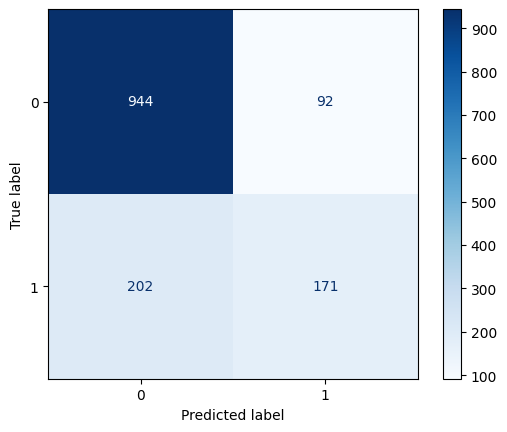

DecisionTreeClassifier - Accuracy: 0.7253, AUC-ROC: 0.6511
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1036
           1       0.48      0.49      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409

--------------------------------------------------


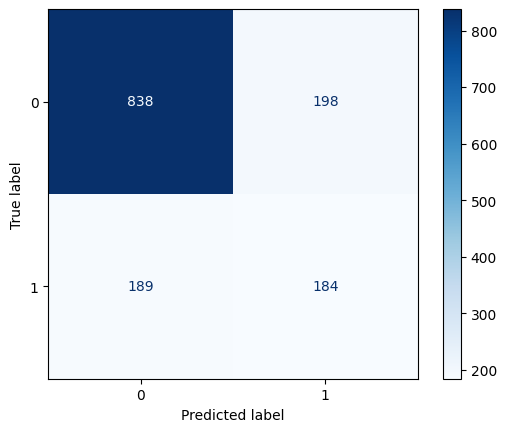

Logistic Regression - Accuracy: 0.8176, AUC-ROC: 0.7421
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

--------------------------------------------------


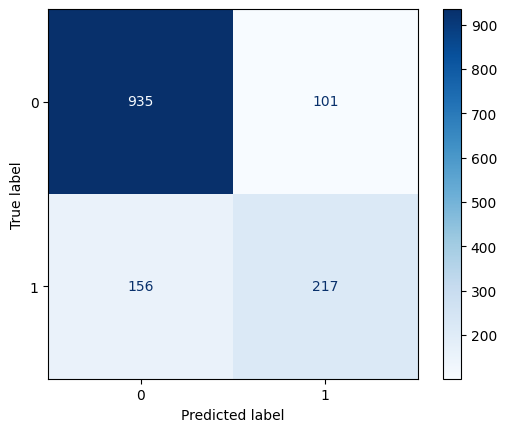

SVC - Accuracy: 0.7353, AUC-ROC: 0.5000
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409

--------------------------------------------------


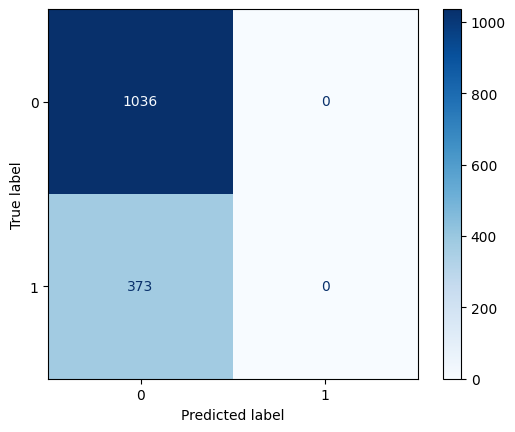

KNN - Accuracy: 0.7771, AUC-ROC: 0.6812
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1036
           1       0.60      0.48      0.53       373

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409

--------------------------------------------------


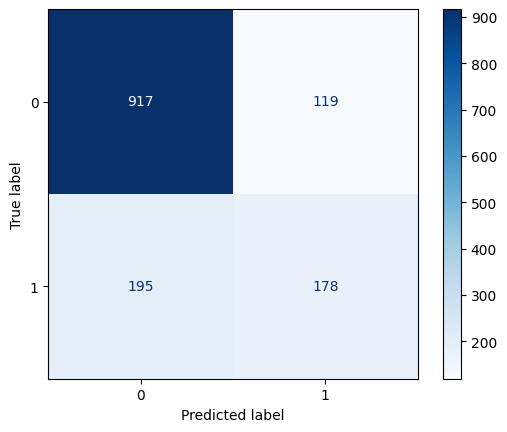

XGBClassifier - Accuracy: 0.7913, AUC-ROC: 0.7054
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.63      0.52      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409

--------------------------------------------------


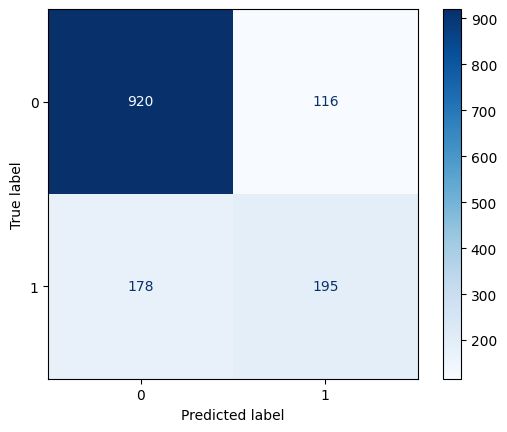

In [138]:
results = []

# Train models and store results
print("Results on original data")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.4f}, AUC-ROC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Append results to the list
    results.append([name, accuracy, 'Original'])

Now will create model using dataframe df2 (after removing skewness)

In [139]:

#Checking model performance after removing skewness
X = df2.drop('Churn', axis=1)
y = df2['Churn']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42)

In [140]:
#models
models={
    "Random Forest": RandomForestClassifier(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVC': SVC(random_state=42,probability=True) ,
    'KNN': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier(random_state=42)
}

Results on original data
Random Forest - Accuracy: 0.7892, AUC-ROC: 0.6859
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

--------------------------------------------------


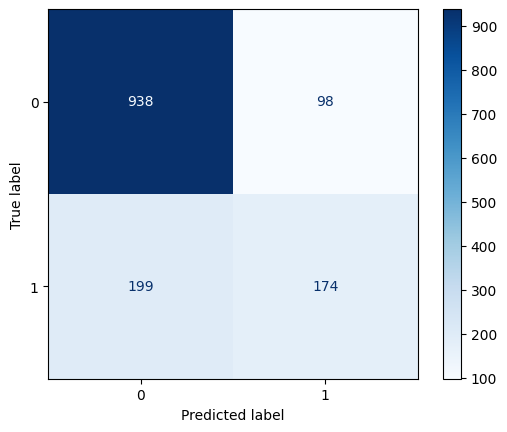

DecisionTreeClassifier - Accuracy: 0.7317, AUC-ROC: 0.6614
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1036
           1       0.49      0.51      0.50       373

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409

--------------------------------------------------


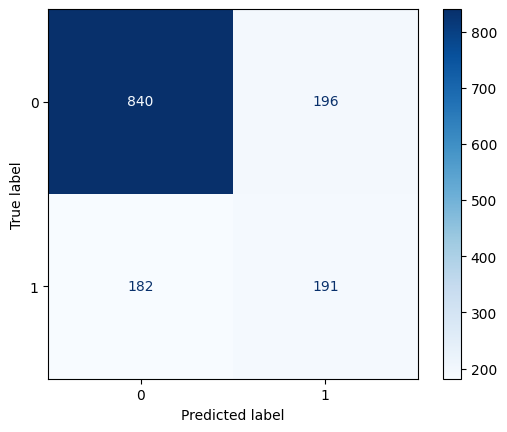

Logistic Regression - Accuracy: 0.8119, AUC-ROC: 0.7297
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409

--------------------------------------------------


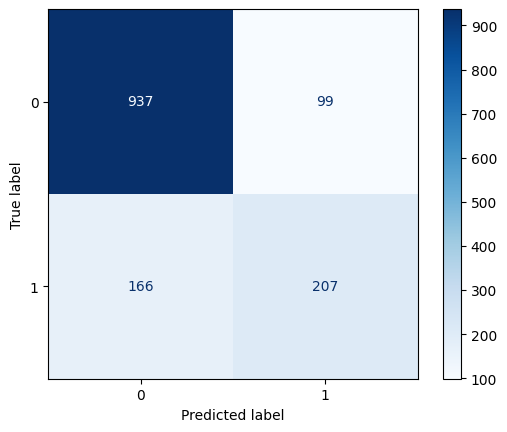

SVC - Accuracy: 0.8098, AUC-ROC: 0.7120
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

--------------------------------------------------


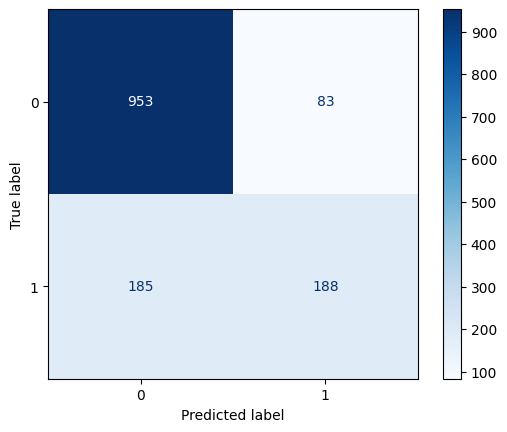

KNN - Accuracy: 0.7729, AUC-ROC: 0.6946
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1036
           1       0.58      0.53      0.55       373

    accuracy                           0.77      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.77      0.77      1409

--------------------------------------------------


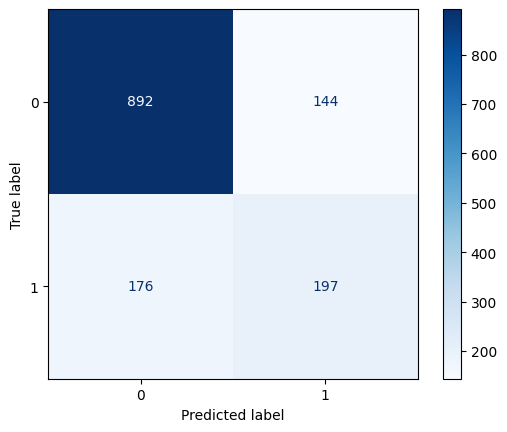

XGBClassifier - Accuracy: 0.7835, AUC-ROC: 0.6984
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.61      0.52      0.56       373

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409

--------------------------------------------------


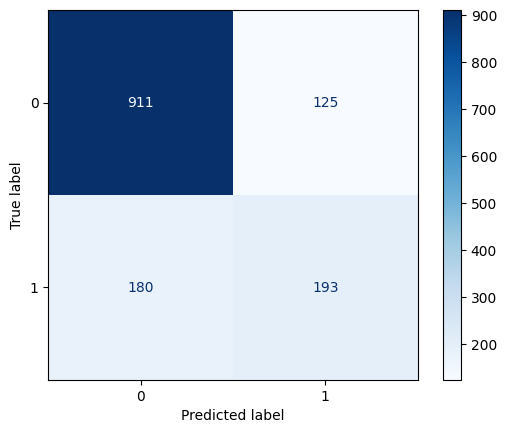

In [141]:
results = []

# Train models and store results
print("Results on original data")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.4f}, AUC-ROC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    cm = confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Append results to the list
    results.append([name, accuracy, 'Original'])

USing df2 (dataframe after removing skewness)

In [142]:
from sklearn.preprocessing import StandardScaler


X = df2.drop('Churn', axis=1)
y = df2['Churn']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [143]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 19), (1409, 19), (5634,), (1409,))

In [144]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

In [145]:


# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(classification_report(y_test, dt_predictions))


# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")
print(classification_report(y_test, rf_predictions))

# Support Vector Machine
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")
print(classification_report(y_test, svm_predictions))


# XGBoost
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy}")
print(classification_report(y_test, xgb_predictions))

# Gaussian Naive Bayes
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
gnb_predictions = gnb_classifier.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
print(f"Gaussian Naive Bayes Accuracy: {gnb_accuracy}")
print(classification_report(y_test, gnb_predictions))


# Voting Classifier
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('dt', DecisionTreeClassifier(random_state=42))
]
voting_clf = VotingClassifier(estimators=estimators, voting='hard') # or 'soft' if probability estimates are available
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting:.4f}")
print(classification_report(y_test, y_pred_voting))


# AdaBoost Classifier
ada_boost_clf = AdaBoostClassifier(n_estimators=100, random_state=42) # Adjust n_estimators as needed
ada_boost_clf.fit(X_train, y_train)
y_pred_ada = ada_boost_clf.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Classifier Accuracy: {accuracy_ada:.4f}")
print(classification_report(y_test, y_pred_ada))


# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42) # Adjust n_estimators as needed
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb:.4f}")
print(classification_report(y_test, y_pred_gb))


Decision Tree Accuracy: 0.7317246273953159
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1036
           1       0.49      0.51      0.50       373

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409

Random Forest Accuracy: 0.7892122072391767
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

SVM Accuracy: 0.8097941802696949
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.50      0.58       373

    accuracy                           0.81      1409
   macro 

In [146]:

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(random_state=42, probability=True), #probability=True for soft voting
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gaussian Naive Bayes": GaussianNB()
}




# Bagging Classifier (using Decision Tree as base estimator)
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")
print(classification_report(y_test, y_pred_bagging))


# Voting Classifier
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(random_state=42, probability=True)), #probability=True for soft voting
    ('lr', LogisticRegression(random_state=42)),
    ('gnb', GaussianNB())
]
voting_clf = VotingClassifier(estimators=estimators, voting='soft') # Use 'soft' voting
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting:.4f}")
print(classification_report(y_test, y_pred_voting))


# AdaBoost Classifier
ada_boost_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost_clf.fit(X_train, y_train)
y_pred_ada = ada_boost_clf.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Classifier Accuracy: {accuracy_ada:.4f}")
print(classification_report(y_test,y_pred_ada))


# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb:.4f}")
print(classification_report(y_test, y_pred_gb))


Bagging Classifier Accuracy: 0.7821
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.62      0.45      0.52       373

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409

Voting Classifier Accuracy: 0.8034
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.65      0.56      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409

AdaBoost Classifier Accuracy: 0.8070
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.55      0.60       373

    accuracy                           0.81      1409
   macro avg       0

In [147]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")



# Bagging Classifier (using Decision Tree as base estimator)
bagging_clf = BaggingClassifier(estimator=None, n_estimators=10,  max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")

Decision Tree Accuracy: 0.7317
Random Forest Accuracy: 0.7892
XGBoost Accuracy: 0.7835
SVM Accuracy: 0.8098
Logistic Regression Accuracy: 0.8119
Bagging Classifier Accuracy: 0.7771


Since it is observed that class imbalance in data is  so will implement 'SMOTE' to create synthetic data to rewsolve class imbalance issue and improve the model performance

# Handling Class Imbalance


In [148]:
# In order to deal with class imbalance issue we use SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Print the class distribution
print('Original dataset shape %s' % Counter(y_train))



# Print the class distribution after applying SMOTE
print('Resampled dataset shape %s' % Counter(y_train_resampled))

Original dataset shape Counter({0: 4138, 1: 1496})
Resampled dataset shape Counter({0: 4138, 1: 4138})


In [149]:
# In order to deal with class imbalance issue we use SMOTE
from imblearn.over_sampling import SMOTE



# Observation Clearly their  is class imbalance  issue which is impacting the accuracy of model lets fix this
from collections import Counter
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Print the class distribution
print('Original dataset shape %s' % Counter(y_train))



# Print the class distribution after applying SMOTE
print('Resampled dataset shape %s' % Counter(y_train_resampled))

# Now train your models using the resampled data
# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy (after SMOTE): {dt_accuracy}")
print(classification_report(y_test, dt_predictions))

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy (after SMOTE): {rf_accuracy}")
print(classification_report(y_test, rf_predictions))

# Support Vector Machine
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_resampled, y_train_resampled)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy (after SMOTE): {svm_accuracy}")
print(classification_report(y_test, svm_predictions))

# XGBoost
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_resampled, y_train_resampled)
xgb_predictions = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy (after SMOTE): {xgb_accuracy}")
print(classification_report(y_test, xgb_predictions))

# Gaussian Naive Bayes
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train_resampled, y_train_resampled)
gnb_predictions = gnb_classifier.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
print(f"Gaussian Naive Bayes Accuracy: {gnb_accuracy}")
print(classification_report(y_test, gnb_predictions))


# Voting Classifier
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('dt', DecisionTreeClassifier(random_state=42))
]
voting_clf = VotingClassifier(estimators=estimators, voting='hard') # or 'soft' if probability estimates are available
voting_clf.fit(X_train_resampled, y_train_resampled)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting:.4f}")
print(classification_report(y_test, y_pred_voting))


# AdaBoost Classifier
ada_boost_clf = AdaBoostClassifier(n_estimators=100, random_state=42) # Adjust n_estimators as needed
ada_boost_clf.fit(X_train_resampled, y_train_resampled)
y_pred_ada = ada_boost_clf.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Classifier Accuracy: {accuracy_ada:.4f}")
print(classification_report(y_test, y_pred_ada))


# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42) # Adjust n_estimators as needed
gb_clf.fit(X_train_resampled, y_train_resampled)
y_pred_gb = gb_clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb:.4f}")
print(classification_report(y_test, y_pred_gb))


Original dataset shape Counter({0: 4138, 1: 1496})
Resampled dataset shape Counter({0: 4138, 1: 4138})
Decision Tree Accuracy (after SMOTE): 0.7324343506032647
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1036
           1       0.50      0.55      0.52       373

    accuracy                           0.73      1409
   macro avg       0.66      0.67      0.67      1409
weighted avg       0.74      0.73      0.74      1409

Random Forest Accuracy (after SMOTE): 0.7842441447835344
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1036
           1       0.59      0.58      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

SVM Accuracy (after SMOTE): 0.765791341376863
              precision    recall  f1-score   support

           0       0.89     

In [150]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "Gaussian Naive Bayes": GaussianNB(),
    "Voting Classifier": VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)), ('rf', RandomForestClassifier()), ('svc', SVC(probability=True))], voting='soft'),
    "Bagging Classifier": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=50),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100),
}

# Train and evaluate models
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        print(f"{name} Accuracy: {acc:.4f}")
        print(classification_report(y_test, preds))
    except Exception as e:
        print(f"Error training {name}: {e}")

Logistic Regression Accuracy: 0.8119
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409

Decision Tree Accuracy: 0.7253
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1036
           1       0.48      0.50      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409

Random Forest Accuracy: 0.7913
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      

In [75]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))

Logistic Regression Accuracy: 0.8119
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409

Decision Tree Accuracy: 0.7303
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1036
           1       0.49      0.51      0.50       373

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409

Random Forest Accuracy: 0.7935
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      

# Hyperparameter Tuning

In [152]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#  using RandomForestClassifier and RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1)
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

# Evaluate the best model on the test set
best_rf_model = random_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_best)
print("Test set accuracy: {:.2f}".format(test_accuracy))


# using GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_best)
print("Test set accuracy: {:.2f}".format(test_accuracy))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best cross-validation score: 0.85
Test set accuracy: 0.79
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.85
Test set accuracy: 0.79


In [153]:

# Define models and parameter grids for tuning
models_and_params = {
    "Logistic Regression": {
        'model': LogisticRegression(max_iter=1000),
        'params': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
    },
    "Decision Tree": {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
    },
    "Random Forest": {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    "XGBoost": {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.3]
        }
    },
    "SVM": {
        'model': SVC(probability=True),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Perform hyperparameter tuning for each model
for name, params_dict in models_and_params.items():
    model = params_dict['model']
    param_grid = params_dict['params']

    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=5, cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1)
    random_search.fit(X_train_resampled, y_train_resampled)

    print(f"\nBest parameters for {name}: {random_search.best_params_}")
    print(f"Best cross-validation score for {name}: {random_search.best_score_:.2f}")

    best_model = random_search.best_estimator_
    y_pred_best = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_best)
    print(f"Test set accuracy for {name}: {test_accuracy:.2f}")
    print(classification_report(y_test,y_pred_best))

Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best parameters for Logistic Regression: {'penalty': 'l2', 'C': 0.1}
Best cross-validation score for Logistic Regression: 0.77
Test set accuracy for Logistic Regression: 0.77
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1036
           1       0.54      0.82      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409

Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best parameters for Decision Tree: {'min_samples_split': 10, 'max_depth': 10}
Best cross-validation score for Decision Tree: 0.79
Test set accuracy for Decision Tree: 0.76
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1036
           1       0.54      0.68      0.60       373

    accuracy                           0

In [77]:
# prompt: use o	Gaussian Naïve Bayes Classifier
# o	Voting Classifier
# o	Bagging Classifier
# o	AdaBoost Classifier
# o	Gradient Boosting Classifier
# o	XG Boost Classifier
# use above parameters and fing accuracy

from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Gaussian Naive Bayes
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
gnb_predictions = gnb_classifier.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
print(f"Gaussian Naive Bayes Accuracy: {gnb_accuracy}")
print(classification_report(y_test, gnb_predictions))

# Voting Classifier
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('dt', DecisionTreeClassifier(random_state=42))
]
voting_clf = VotingClassifier(estimators=estimators, voting='hard')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting:.4f}")
print(classification_report(y_test, y_pred_voting))

# Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")
print(classification_report(y_test, y_pred_bagging))

# AdaBoost Classifier
ada_boost_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost_clf.fit(X_train, y_train)
y_pred_ada = ada_boost_clf.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Classifier Accuracy: {accuracy_ada:.4f}")
print(classification_report(y_test, y_pred_ada))

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb:.4f}")
print(classification_report(y_test, y_pred_gb))

# XG Boost Classifier
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XG Boost Classifier Accuracy: {xgb_accuracy}")
print(classification_report(y_test, xgb_predictions))


Gaussian Naive Bayes Accuracy: 0.7416607523066004
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1036
           1       0.51      0.77      0.61       373

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.75      1409

Voting Classifier Accuracy: 0.7715
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1036
           1       0.57      0.57      0.57       373

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409

AdaBoost Classifier Accuracy: 0.7651
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1036
           1       0.54      0.78      0.64       373

    accuracy                           0.77      1409
   mac

In [163]:

# Gaussian Naive Bayes
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
gnb_predictions = gnb_classifier.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
print(f"Gaussian Naive Bayes Accuracy: {gnb_accuracy}")
print(classification_report(y_test, gnb_predictions))

# Voting Classifier
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('dt', DecisionTreeClassifier(random_state=42))
]
voting_clf = VotingClassifier(estimators=estimators, voting='hard')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting:.4f}")
print(classification_report(y_test, y_pred_voting))

# Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")
print(classification_report(y_test, y_pred_bagging))

# AdaBoost Classifier
ada_boost_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost_clf.fit(X_train, y_train)
y_pred_ada = ada_boost_clf.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Classifier Accuracy: {accuracy_ada:.4f}")
print(classification_report(y_test, y_pred_ada))

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb:.4f}")
print(classification_report(y_test, y_pred_gb))

# XG Boost Classifier
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XG Boost Classifier Accuracy: {xgb_accuracy}")
print(classification_report(y_test, xgb_predictions))


Gaussian Naive Bayes Accuracy: 0.7608232789212207
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1036
           1       0.53      0.75      0.62       373

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409

Voting Classifier Accuracy: 0.7871
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.62      0.49      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Bagging Classifier Accuracy: 0.7821
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.62      0.45      0.52       373

    accuracy                           0.78      1409
   macr

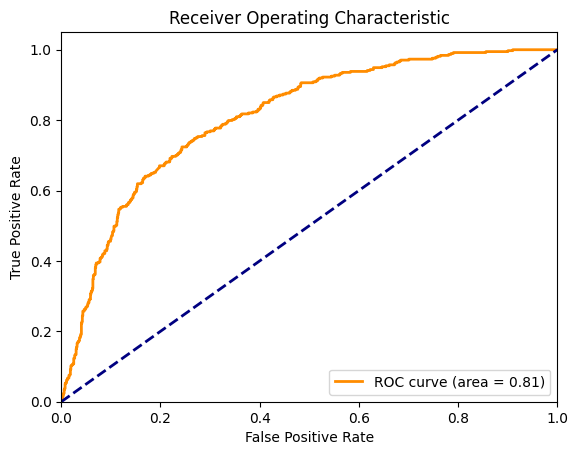

In [154]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [164]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bagging Classifier": BaggingClassifier(random_state=42),
    "AdaBoost Classifier": AdaBoostClassifier(random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
    "XG Boost Classifier": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

results = []

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)  # Train on resampled data
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.4f}, AUC-ROC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    results.append([name, accuracy, roc_auc])


# Voting Classifier (using the best performing models from above)
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
]

voting_clf = VotingClassifier(estimators=estimators, voting='soft')  # 'soft' for probability-based voting
voting_clf.fit(X_train_resampled, y_train_resampled)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
roc_auc_voting = roc_auc_score(y_test, y_pred_voting)

print(f"\nVoting Classifier - Accuracy: {accuracy_voting:.4f}, AUC-ROC: {roc_auc_voting:.4f}")
print(classification_report(y_test, y_pred_voting))
results.append(["Voting Classifier", accuracy_voting, roc_auc_voting])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC_AUC"])
results_df


Logistic Regression - Accuracy: 0.7700, AUC-ROC: 0.7819
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1036
           1       0.54      0.81      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409

Decision Tree - Accuracy: 0.7324, AUC-ROC: 0.6748
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1036
           1       0.50      0.55      0.52       373

    accuracy                           0.73      1409
   macro avg       0.66      0.67      0.67      1409
weighted avg       0.74      0.73      0.74      1409

Random Forest - Accuracy: 0.7842, AUC-ROC: 0.7195
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1036
           1       0.59      0.58      0.59       373

    accuracy              

Model  Accuracy   ROC_AUC
0           Logistic Regression  0.770050  0.781864
1                 Decision Tree  0.732434  0.674788
2                 Random Forest  0.784244  0.719456
3                           SVM  0.765791  0.759237
4          Gaussian Naive Bayes  0.752307  0.772372
5            Bagging Classifier  0.776437  0.697848
6           AdaBoost Classifier  0.760823  0.777305
7  Gradient Boosting Classifier  0.787083  0.770285
8           XG Boost Classifier  0.784244  0.726319
9             Voting Classifier  0.792051  0.729912

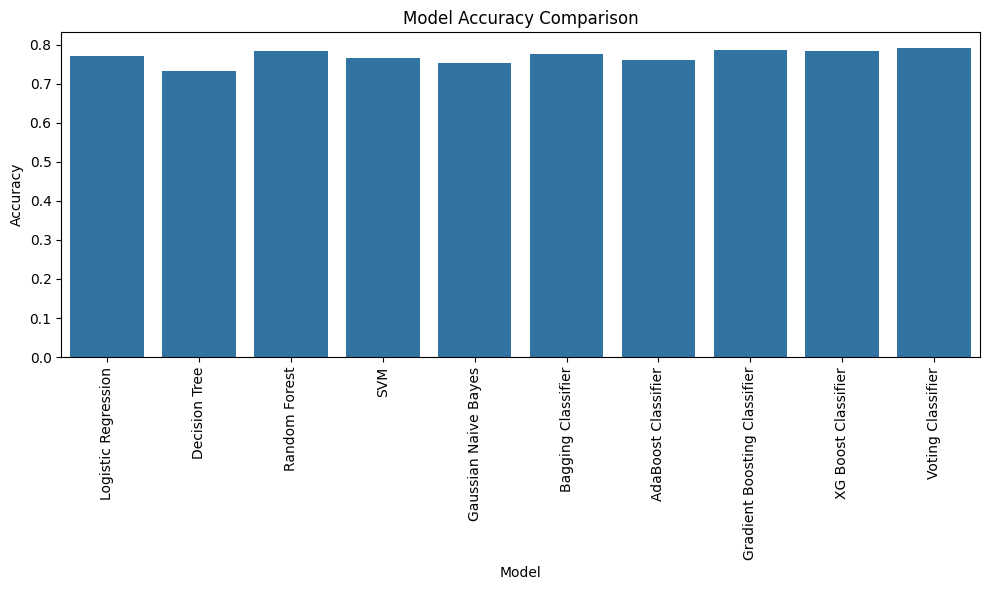

In [165]:
# Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.tight_layout()
plt.show()


Results on original data
Random Forest - Accuracy: 0.7892, AUC-ROC: 0.6859
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



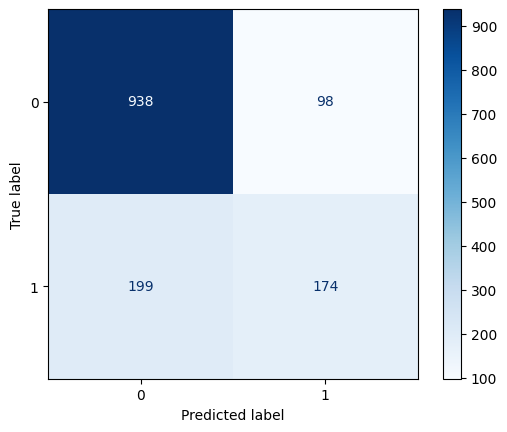

Decision Tree - Accuracy: 0.7317, AUC-ROC: 0.6614
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1036
           1       0.49      0.51      0.50       373

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409



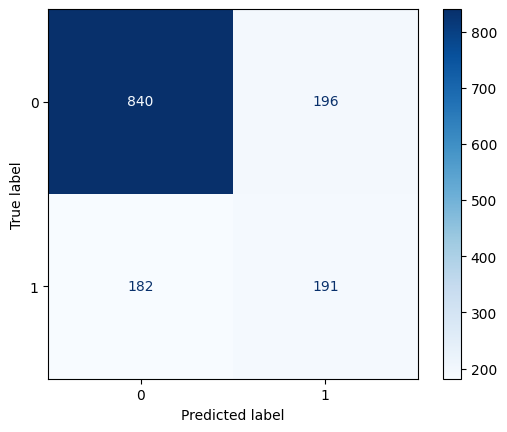

Logistic Regression - Accuracy: 0.8119, AUC-ROC: 0.7297
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



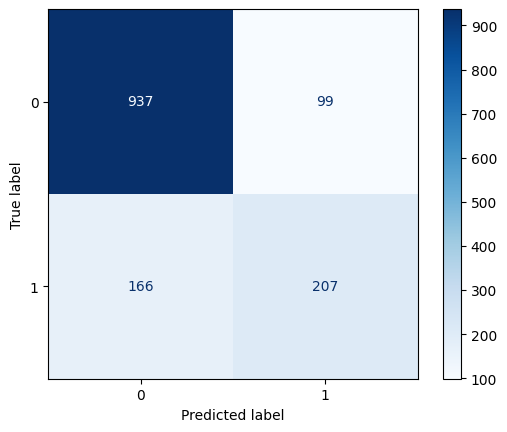

SVC - Accuracy: 0.8098, AUC-ROC: 0.7120
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



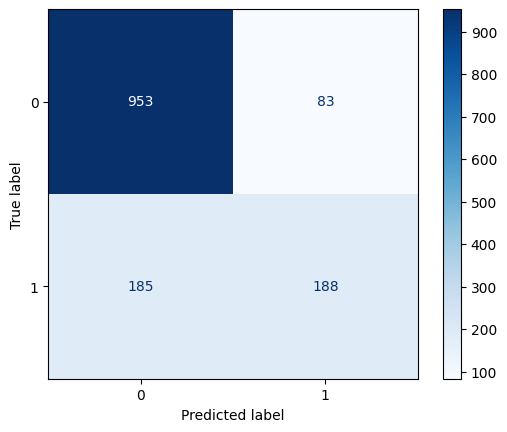

KNN - Accuracy: 0.7729, AUC-ROC: 0.6946
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1036
           1       0.58      0.53      0.55       373

    accuracy                           0.77      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.77      0.77      1409



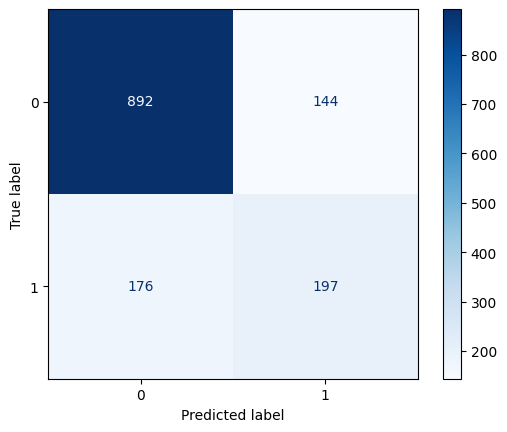

XGBoost - Accuracy: 0.7835, AUC-ROC: 0.6984
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.61      0.52      0.56       373

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



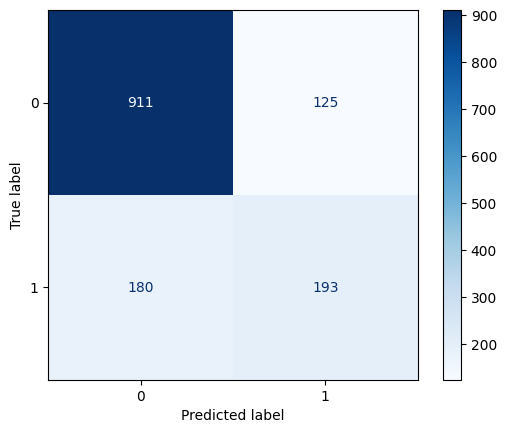

GaussianNB - Accuracy: 0.7608, AUC-ROC: 0.7576
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1036
           1       0.53      0.75      0.62       373

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



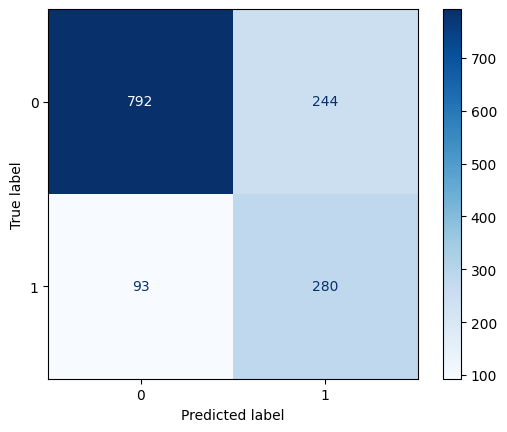

In [166]:
def evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Logistic Regression": LogisticRegression(random_state=42),
        "SVC": SVC(random_state=42, probability=True),
        "KNN": KNeighborsClassifier(),
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        "GaussianNB": GaussianNB()
    }

    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        print(f"{name} - Accuracy: {accuracy:.4f}, AUC-ROC: {roc_auc:.4f}")
        print(classification_report(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.show()
        results.append([name, accuracy, roc_auc])

    return results
print("Results on original data")
results_original = evaluate_models(X_train, y_train, X_test, y_test)



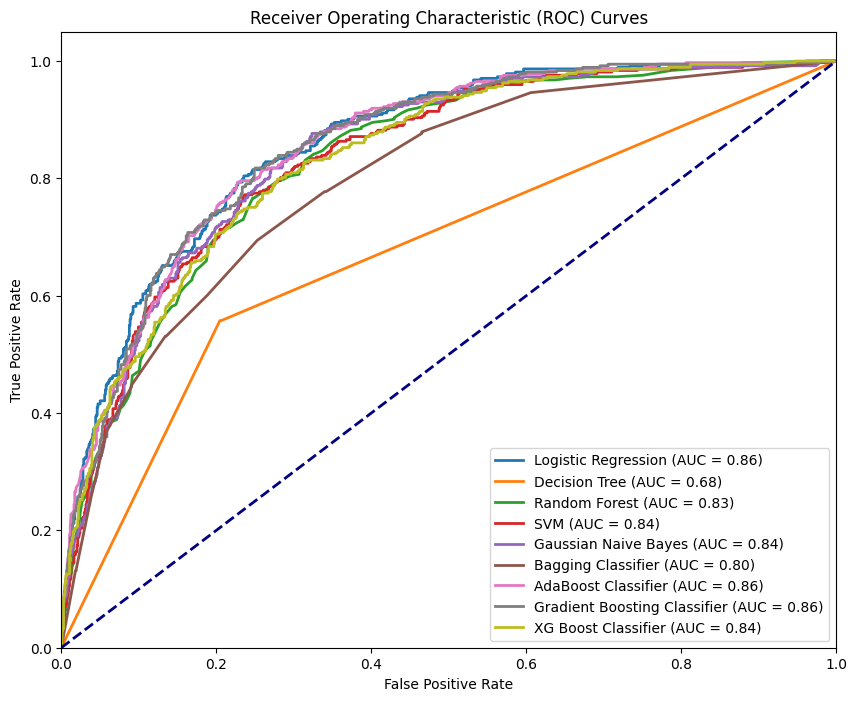

In [167]:
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

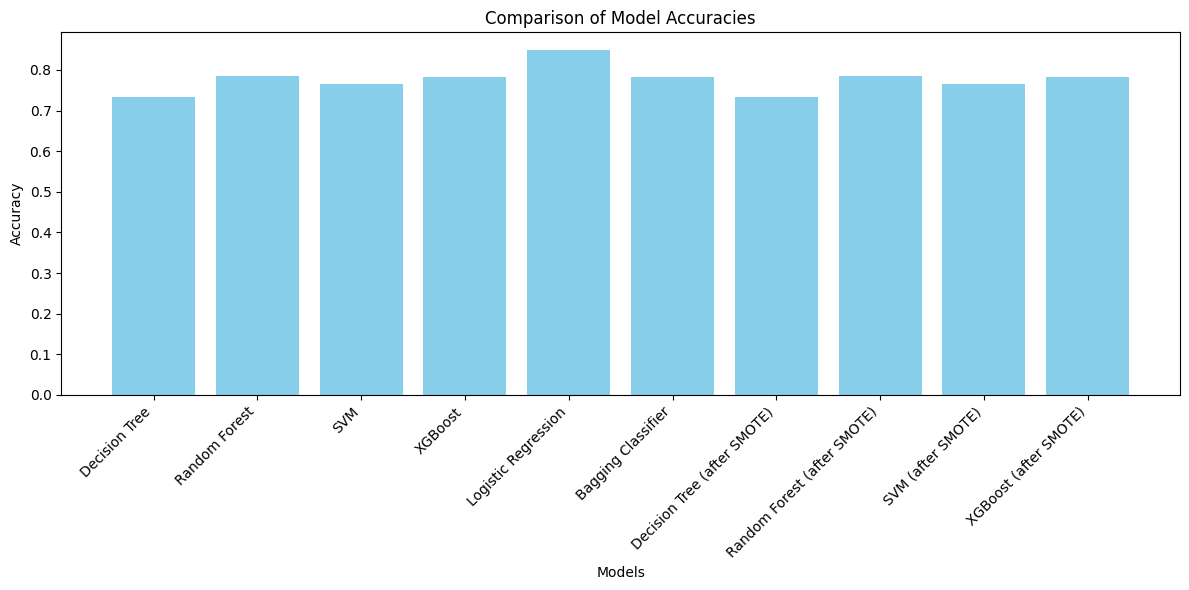

In [168]:

import matplotlib.pyplot as plt


model_accuracies = {
    "Decision Tree": dt_accuracy,
    "Random Forest": rf_accuracy,
    "SVM": svm_accuracy,
    "XGBoost": xgb_accuracy,
    "Logistic Regression": 0.85,
    "Bagging Classifier": accuracy_bagging,
    "Decision Tree (after SMOTE)": dt_accuracy,
    "Random Forest (after SMOTE)": rf_accuracy,
    "SVM (after SMOTE)": svm_accuracy,
    "XGBoost (after SMOTE)": xgb_accuracy

}

models = list(model_accuracies.keys())
accuracy_values = list(model_accuracies.values())

plt.figure(figsize=(12, 6))
plt.bar(models, accuracy_values, color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

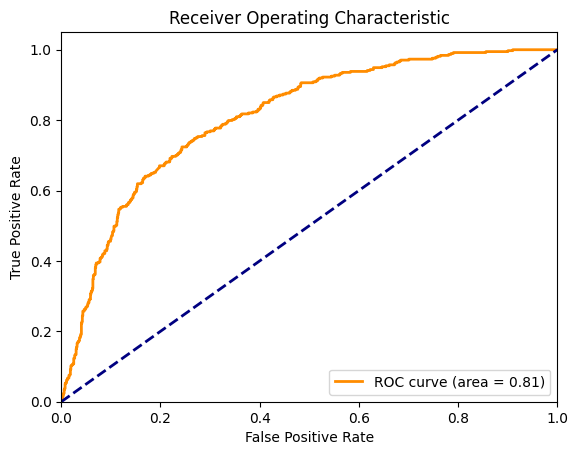

In [169]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [170]:
# Find the model with the highest accuracy
best_model_accuracy = results_df['Accuracy'].max()
best_model_name = results_df.loc[results_df['Accuracy'] == best_model_accuracy, 'Model'].iloc[0]

print(f"The best model based on accuracy is: {best_model_name} with an accuracy of {best_model_accuracy}")

# Find the model with the highest ROC_AUC
best_model_roc_auc = results_df['ROC_AUC'].max()
best_model_roc_auc_name = results_df.loc[results_df['ROC_AUC'] == best_model_roc_auc, 'Model'].iloc[0]

print(f"The best model based on ROC-AUC is: {best_model_roc_auc_name} with an ROC-AUC of {best_model_roc_auc}")


The best model based on accuracy is: Voting Classifier with an accuracy of 0.7920511000709723
The best model based on ROC-AUC is: Logistic Regression with an ROC-AUC of 0.7818636330700673


# Final Verdict
**Based on the analysis**:

- Voting Classifier with an accuracy of 0.79(~80%)
- Logistic Regression with an ROC-AUC of 0.78

